In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from autokeras import StructuredDataRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import shutil

# Train function autokeras

In [3]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from autokeras import StructuredDataRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import tensorflow as tf

def train_and_evaluate(target_column, synthetic_file_name, max_trials, directory_path, epochs):
    synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
    real_directory_path = os.path.join(directory_path, 'Splited datasets')

    synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
    synthetic_data = pd.read_csv(synthetic_file_path)
    
    X = synthetic_data.drop(target_column, axis=1)
    y = synthetic_data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    reg = StructuredDataRegressor(column_names=X_train.columns.tolist(), max_trials=max_trials, loss='mean_squared_error')
    reg.fit(x=X_train, y=y_train, epochs=epochs)
    
    best_model = reg.export_model()
    model_config = best_model.get_config()
    # model_save_path = os.path.join(directory_path, 'best_model')
    # best_model.save(model_save_path, save_format='tf')

    y_pred = reg.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    real_file_path = os.path.join(real_directory_path, target_column + '.csv')
    real_data = pd.read_csv(real_file_path)
    real_y_pred = reg.predict(real_data.drop(target_column, axis=1))

    predictions_df = pd.DataFrame(real_y_pred, columns=['Predicted_' + target_column])
    real_data_with_predictions = real_data.join(predictions_df)
    output_file_path = os.path.join(real_directory_path, 'real_data_with_predictions.csv')
    real_data_with_predictions.to_csv(output_file_path, index=False, sep=';')

    plt.figure(figsize=(12, 7))
    plt.plot(real_data_with_predictions[target_column], label='Actual ' + target_column, marker='o')
    plt.plot(real_data_with_predictions['Predicted_' + target_column], label='Predicted ' + target_column, marker='x')
    plt.title('Comparison of Actual and Predicted ' + target_column + ' Values')
    plt.xlabel('Index')
    plt.ylabel(target_column + ' Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    # print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R2): {r2}")
    print("Model Configuration:", model_config)

    shutil.rmtree('C:/Nikolas/Intership/Композитные материалы/Train datasets/structured_data_regressor')

In [ ]:
def load_and_use_model(model_path, real_file_path, target_column):
    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Load real dataset
    real_data = pd.read_csv(real_file_path)
    X_real = real_data.drop(target_column, axis=1)
    y_real = real_data[target_column]

    # Predict using the loaded model
    y_pred_real = model.predict(X_real)

    # Evaluate predictions
    mae_real = mean_absolute_error(y_real, y_pred_real)
    mse_real = mean_squared_error(y_real, y_pred_real)
    r2_real = r2_score(y_real, y_pred_real)

    print(f"Loaded Model Evaluation on Real Dataset:")
    print(f"Mean Absolute Error: {mae_real}")
    print(f"Mean Squared Error: {mse_real}")
    print(f"R-squared: {r2_real}")


Trial 2 Complete [00h 00m 16s]
val_loss: 290.651123046875

Best val_loss So Far: 241.34165954589844
Total elapsed time: 00h 00m 29s
Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 806.7464 - mean_squared_error: 806.7464
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 327.2891 - mean_squared_error: 327.2891
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 289.3545 - mean_squared_error: 289.3545
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 266.2784 - mean_squared_error: 266.2784
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 253.6597 - mean_squared_error: 253.6597
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 247.2229 - mean_squared_error: 247.2229
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 243.8400 - mean_squared_error: 243.8400
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - lo

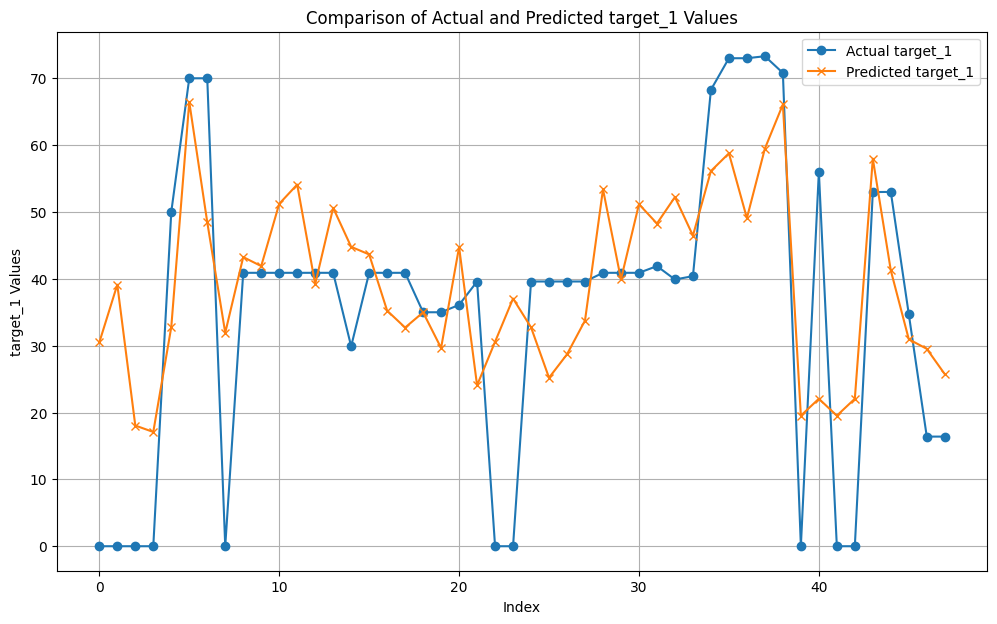

Mean Absolute Error (MAE): 12.61615526914283
Mean Squared Error (MSE): 241.51737352324218
R-squared (R2): 0.4259007914192957
Model Configuration: {'name': 'model', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 16), 'dtype': 'float64', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'name': 'input_1', 'inbound_nodes': []}, {'class_name': 'Custom>MultiCategoryEncoding', 'config': {'name': 'multi_category_encoding', 'trainable': True, 'dtype': 'float32', 'encoding': ListWrapper(['none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'int'])}, 'name': 'multi_category_encoding', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'class_name': 'Normalization', 'config': {'name': 'normalization', 'trainable': True, 'dtype': 'float32', 'axis': (-1,), 'mean': None, 'variance': None}, 'name': 'normalization', 'inbound_nodes': [[['multi_category_encoding', 0, 0, {}]]]}, {'class_name': 'Dense', 'conf

In [22]:
# Usage example:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
train_and_evaluate('target_1', 'synthetic_target_1', 2, directory_path, 10)

In [23]:
directory_path = r'C:\Nikolas\Intership\Композитные материалы\Datasets\Dataset ПП04'
model_path = os.path.join(directory_path, 'best_model')
real_file_path = r'C:\Nikolas\Intership\Композитные материалы\Datasets\Dataset ПП04\Splited datasets\target_1.csv'
target_column = 'target_1'

load_and_use_model(model_path, real_file_path, target_column)


OSError: No file or directory found at C:\Nikolas\Intership\Композитные материалы\Datasets\Dataset ПП04\best_model

# Train & test cycle autokeras 

In [ ]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'

In [ ]:
# Target_1
train_and_evaluate('target_1', 'synthetic_target_1', 25, directory_path, 150)

In [ ]:
# Target_2
train_and_evaluate('target_2', 'synthetic_target_2', 25, directory_path, 150)

In [ ]:
# Target_3
train_and_evaluate('target_3', 'synthetic_target_3', 25, directory_path, 150)

In [ ]:
# Target_4
train_and_evaluate('target_4', 'synthetic_target_4', 25, directory_path, 150)

In [ ]:
# Target_5
train_and_evaluate('target_5', 'synthetic_target_5', 25, directory_path, 150)

In [ ]:
# Target_6
train_and_evaluate('target_6', 'synthetic_target_6', 25, directory_path, 150)

In [ ]:
# Target_7
train_and_evaluate('target_7', 'synthetic_target_7', 25, directory_path, 150)

In [ ]:
# Target_8
train_and_evaluate('target_8', 'synthetic_target_8', 25, directory_path, 150)

In [ ]:
# Target_9
train_and_evaluate('target_9', 'synthetic_target_9', 25, directory_path, 150)

In [ ]:
# Target_10
train_and_evaluate('target_10', 'synthetic_target_10', 25, directory_path, 150)

In [ ]:
# Target_11
train_and_evaluate('target_11', 'synthetic_target_11', 25, directory_path, 150)

In [ ]:
# Target_12
train_and_evaluate('target_12', 'synthetic_target_12', 25, directory_path, 150)

In [ ]:
# Target_13
train_and_evaluate('target_13', 'synthetic_target_13', 25, directory_path, 150)

In [ ]:
# Target_14
train_and_evaluate('target_14', 'synthetic_target_14', 25, directory_path, 150)

In [ ]:
# Target_15
train_and_evaluate('target_15', 'synthetic_target_15', 25, directory_path, 150)

In [ ]:
# Target_16
train_and_evaluate('target_16', 'synthetic_target_16', 25, directory_path, 150)

In [ ]:
# Target_17
train_and_evaluate('target_17', 'synthetic_target_17', 25, directory_path, 150)

In [ ]:
# Target_18
train_and_evaluate('target_18', 'synthetic_target_18', 25, directory_path, 150)

In [ ]:
# Target_19
train_and_evaluate('target_19', 'synthetic_target_19', 25, directory_path, 150)

In [ ]:
# Target_20
train_and_evaluate('target_20', 'synthetic_target_20', 25, directory_path, 150)

In [ ]:
# Target_21
train_and_evaluate('target_21', 'synthetic_target_21', 25, directory_path, 150)

In [ ]:
# Target_22
train_and_evaluate('target_22', 'synthetic_target_22', 25, directory_path, 150)

In [ ]:
# Target_23
train_and_evaluate('target_23', 'synthetic_target_23', 25, directory_path, 150)

In [ ]:
# Target_24
train_and_evaluate('target_24', 'synthetic_target_24', 25, directory_path, 150)

In [ ]:
# Target_25
train_and_evaluate('target_25', 'synthetic_target_25', 25, directory_path, 150)

In [ ]:
# Target_26
train_and_evaluate('target_26', 'synthetic_target_26', 25, directory_path, 150)

In [ ]:
# Target_27
train_and_evaluate('target_27', 'synthetic_target_27', 25, directory_path, 150)

In [ ]:
# Target_28
train_and_evaluate('target_28', 'synthetic_target_28', 25, directory_path, 150)

In [ ]:
# Target_29
train_and_evaluate('target_29', 'synthetic_target_29', 25, directory_path, 150)

In [ ]:
# Target_30
train_and_evaluate('target_30', 'synthetic_target_30', 25, directory_path, 150)

In [ ]:
# import os

# os.system("shutdown /s /t 0")

# Experiments

In [209]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, ReLU, Activation, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam, legacy
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [210]:
save_path = 'C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/'
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'

## Save model function

In [213]:
def save_model_function(model, save_path, model_name):
    """
    Сохраняет модель в указанный путь.

    :param model: Обученная модель
    :param save_path: Путь для сохранения модели
    :param model_name: Имя файла модели
    """
    model_file_path = os.path.join(save_path, model_name + '.h5')
    model.save(model_file_path)
    print(f"Модель сохранена по пути: {model_file_path}")

## Evaluate model function

In [230]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import matplotlib.pyplot as plt
import keras.backend as K

    # Define the custom metric function
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    
def r2(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true - y_pred)) 
        SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
        return (1 - SS_res/(SS_tot + K.epsilon()))


def model_evaluate(target_column, directory_path, save_path):
    real_directory_path = os.path.join(directory_path, 'Splited datasets')

    # Load unseen data
    unseen_data_path = os.path.join(real_directory_path, target_column + '.csv')
    unseen_data = pd.read_csv(unseen_data_path)

    # Prepare unseen test data
    unseen_test = unseen_data.drop(target_column, axis=1)
    
    # Load scaler (assuming scaler is defined elsewhere in your code)
    scaler = load(save_path + 'scaler.joblib')
    scaled_features = scaler.transform(unseen_test)

    # Load model
    model_path = os.path.join(save_path, target_column + '.h5')
    model = load_model(model_path, custom_objects={'rmse': rmse, 'r2': r2})

    # Load real data
    real_file_path = os.path.join(real_directory_path, target_column + '.csv')
    real_data = pd.read_csv(real_file_path)
    real_data_features = real_data.drop(target_column, axis=1)
    unseen_test = pd.DataFrame(scaled_features, columns=real_data_features.columns)
    
    # Predict
    real_y_pred = model.predict(unseen_test)

    # Prepare predictions DataFrame
    predictions_df = pd.DataFrame(real_y_pred, columns=['Predicted_' + target_column])
    real_data_with_predictions = real_data.join(predictions_df)
    output_file_path = os.path.join(save_path, 'real_data_with_predictions' + '_' + target_column + '.csv')
    real_data_with_predictions.to_csv(output_file_path, index=False, sep=';')

    # Plotting
    plt.figure(figsize=(12, 7))
    plt.plot(real_data_with_predictions[target_column], label='Actual ' + target_column, marker='o')
    plt.plot(real_data_with_predictions['Predicted_' + target_column], label='Predicted ' + target_column, marker='x')
    plt.title('Comparison of Actual and Predicted ' + target_column + ' Values')
    plt.xlabel('Index')
    plt.ylabel(target_column + ' Values')
    plt.legend()
    plt.grid(True)
    plt.show()

## Metric function

In [208]:
# Функция для RMSE
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Функция для R^2
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

# Функция для MAPE
import tensorflow.keras.backend as K
def mape(y_true, y_pred):
    # Отклонение прогнозируемых значений от истинных
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None))
    # Возвращаем среднее значение отклонения в процентах
    return 100. * K.mean(diff, axis=-1)

## target 1

In [422]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_1'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

In [423]:
df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [424]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

In [425]:
# Нормализация данных
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели normalizer
# from joblib import dump
# dump(scaler, 'minmax_scaler.joblib')

# Загрузите модель из файла
# scaler = load('minmax_scaler.joblib')

# X_normalized


In [426]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)


# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [427]:
y = y_default
X = X_standardized

In [428]:
from sklearn.model_selection import train_test_split
# X = df_prepared.drop(['target'], axis=1)
# y = df_prepared['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

In [429]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization

# model = Sequential([
#     Dense(512, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
#     BatchNormalization(),  # Нормализация батча
#     Dropout(0.3),  # Dropout слой

#     Dense(256, activation='relu'),  # Скрытый слой
#     BatchNormalization(),  # Нормализация батча
#     Dropout(0.3),  # Dropout слой

#     Dense(128, activation='relu'),  # Скрытый слой
#     BatchNormalization(),  # Нормализация батча
#     Dropout(0.3),  # Dropout слой

#     Dense(64, activation='relu'),  # Скрытый слой
#     BatchNormalization(),  # Нормализация батча
#     Dropout(0.3),  # Dropout слой

#     Dense(32, activation='relu'),  # Скрытый слой
#     BatchNormalization(),  # Нормализация батча
#     Dropout(0.3),  # Dropout слой

#     Dense(1, activation='linear')  # Выходной слой для регрессии
# ])

In [430]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])

In [431]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [432]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 470.5338 - mae: 17.0228 - mse: 470.5338 - rmse: 20.4749 - r2: -0.2072 - val_loss: 268.7967 - val_mae: 13.2971 - val_mse: 268.7967 - val_rmse: 16.2419 - val_r2: 0.3019
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 255.3587 - mae: 12.9919 - mse: 255.3587 - rmse: 15.8662 - r2: 0.3476 - val_loss: 248.8164 - val_mae: 12.7470 - val_mse: 248.8164 - val_rmse: 15.6209 - val_r2: 0.3534
Epoch 3/150
250/250 [==============================] - 1s 2ms/step - loss: 243.4468 - mae: 12.6435 - mse: 243.4468 - rmse: 15.5038 - r2: 0.3778 - val_loss: 242.1681 - val_mae: 12.5655 - val_mse: 242.1681 - val_rmse: 15.4153 - val_r2: 0.3686
Epoch 4/150
250/250 [==============================] - 0s 1ms/step - loss: 239.5318 - mae: 12.5227 - mse: 239.5318 - rmse: 15.3709 - r2: 0.3847 - val_loss: 240.9180 - val_mae: 12.4574 - val_mse: 240.9180 - val_rmse: 15.3772 - val_r2: 0.3707
Epoch 5/150
250/250 [==============

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_1.h5
2/2 [==============================] - 0s 2ms/step


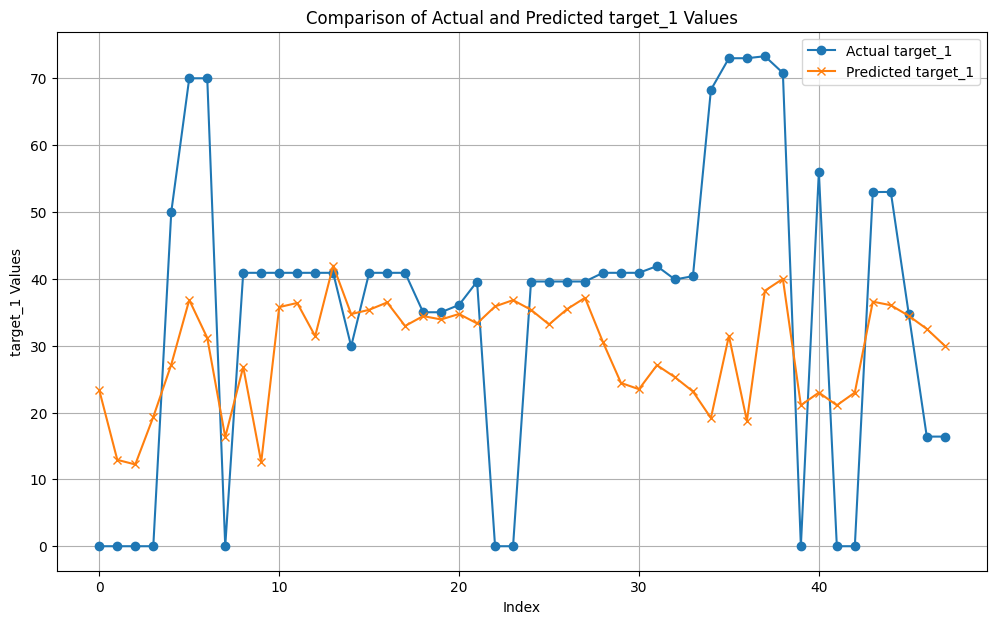

In [433]:
# Target_1
save_model_function(model, save_path, 'target_1')
model_evaluate('target_1', directory_path, save_path)

## target 2

In [216]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_2'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [217]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [218]:
y = y_default
X = X_standardized

In [219]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [220]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [221]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 2.0385 - mae: 1.0492 - mse: 2.0385 - rmse: 1.4067 - r2: 0.3163 - val_loss: 1.8425 - val_mae: 0.9764 - val_mse: 1.8425 - val_rmse: 1.3362 - val_r2: 0.4009
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 1.8025 - mae: 0.9877 - mse: 1.8025 - rmse: 1.3255 - r2: 0.3828 - val_loss: 1.9719 - val_mae: 1.0597 - val_mse: 1.9719 - val_rmse: 1.3898 - val_r2: 0.3343
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 1.7656 - mae: 0.9730 - mse: 1.7656 - rmse: 1.3120 - r2: 0.4087 - val_loss: 1.8848 - val_mae: 1.0152 - val_mse: 1.8848 - val_rmse: 1.3559 - val_r2: 0.3767
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 1.7330 - mae: 0.9629 - mse: 1.7330 - rmse: 1.2984 - r2: 0.4049 - val_loss: 1.9256 - val_mae: 1.0398 - val_mse: 1.9256 - val_rmse: 1.3705 - val_r2: 0.3553
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 1.7343 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_2.h5
2/2 [==============================] - 0s 2ms/step


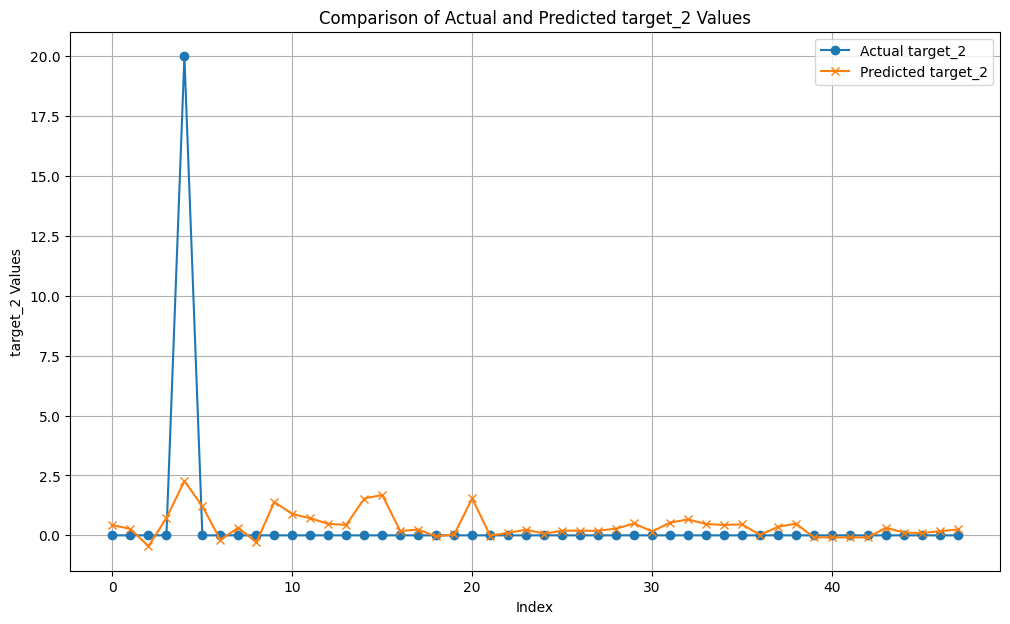

In [231]:
# Target_2
save_model_function(model, save_path, 'target_2')
model_evaluate('target_2', directory_path, save_path)

## target 3

In [122]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_3'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [123]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [124]:
y = y_default
X = X_standardized

In [125]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [126]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [127]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 112.6062 - mae: 7.5887 - mse: 112.6062 - rmse: 10.1172 - r2: 0.4362 - val_loss: 75.6484 - val_mae: 6.5510 - val_mse: 75.6484 - val_rmse: 8.5953 - val_r2: 0.6008
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 70.0354 - mae: 6.1316 - mse: 70.0354 - rmse: 8.2773 - r2: 0.6353 - val_loss: 71.6589 - val_mae: 6.1654 - val_mse: 71.6589 - val_rmse: 8.3626 - val_r2: 0.6206
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 69.1706 - mae: 6.0680 - mse: 69.1706 - rmse: 8.2218 - r2: 0.6405 - val_loss: 72.0566 - val_mae: 6.1421 - val_mse: 72.0566 - val_rmse: 8.3814 - val_r2: 0.6207
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 67.8963 - mae: 6.0013 - mse: 67.8963 - rmse: 8.1353 - r2: 0.6463 - val_loss: 71.7715 - val_mae: 6.1044 - val_mse: 71.7715 - val_rmse: 8.3652 - val_r2: 0.6230
Epoch 5/150
250/250 [==============================] - 0s 2ms/ste

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_3.h5
2/2 [==============================] - 0s 2ms/step


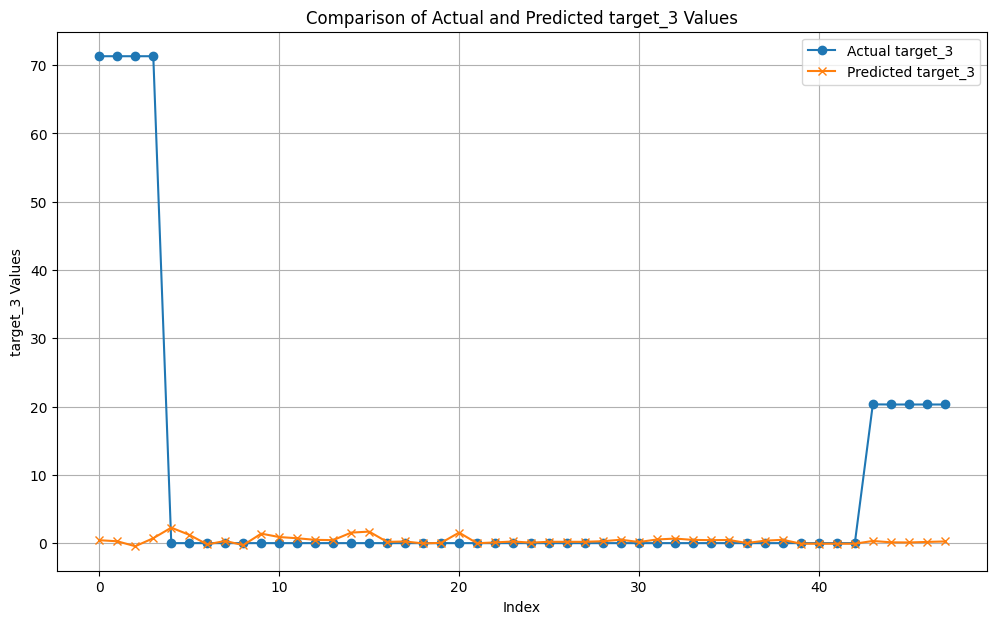

In [232]:
# Target_3
save_model_function(model, save_path, 'target_3')
model_evaluate('target_3', directory_path, save_path)

## target 4

In [233]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_4'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [234]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [235]:
y = y_default
X = X_standardized

In [236]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [237]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [238]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 33.5828 - mae: 4.5045 - mse: 33.5828 - rmse: 5.7186 - r2: 4.0471e-04 - val_loss: 29.6837 - val_mae: 4.3962 - val_mse: 29.6837 - val_rmse: 5.3951 - val_r2: 0.1127
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 30.5198 - mae: 4.3302 - mse: 30.5198 - rmse: 5.4543 - r2: 0.0835 - val_loss: 29.2162 - val_mae: 4.2738 - val_mse: 29.2162 - val_rmse: 5.3446 - val_r2: 0.1326
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 29.9559 - mae: 4.2678 - mse: 29.9559 - rmse: 5.4089 - r2: 0.1037 - val_loss: 29.0538 - val_mae: 4.2242 - val_mse: 29.0538 - val_rmse: 5.3295 - val_r2: 0.1372
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 29.6433 - mae: 4.2490 - mse: 29.6433 - rmse: 5.3766 - r2: 0.1045 - val_loss: 28.7754 - val_mae: 4.2825 - val_mse: 28.7754 - val_rmse: 5.3170 - val_r2: 0.1288
Epoch 5/150
250/250 [==============================] - 0s 2ms/st

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_4.h5
2/2 [==============================] - 0s 3ms/step


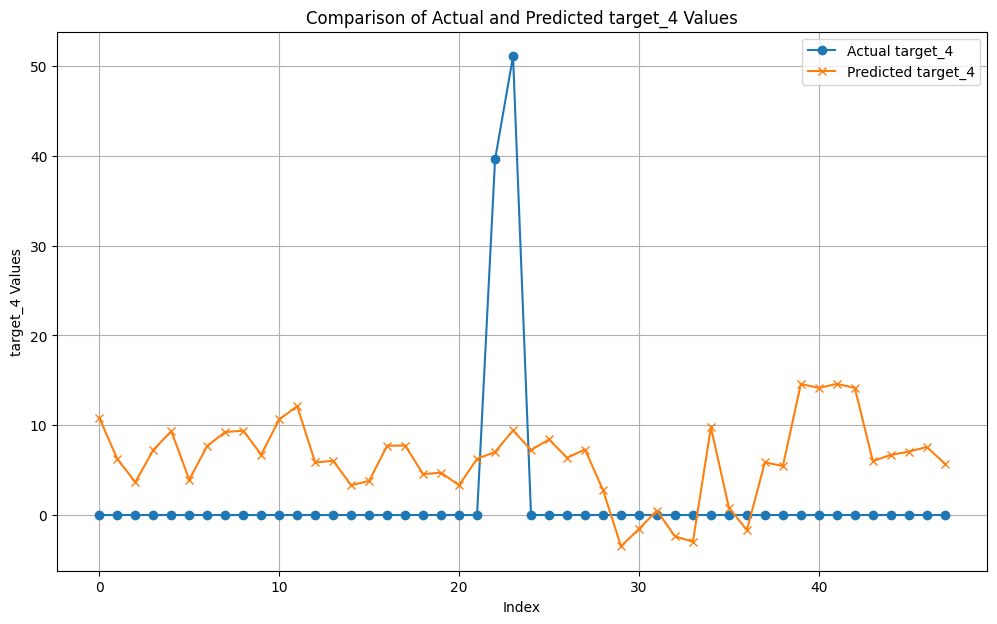

In [239]:
# Target_4
save_model_function(model, save_path, 'target_4')
model_evaluate('target_4', directory_path, save_path)

## target 5

In [240]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_5'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [241]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [242]:
y = y_default
X = X_standardized

In [243]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [244]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [245]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 205.5514 - mae: 11.3105 - mse: 205.5514 - rmse: 13.7959 - r2: -0.0100 - val_loss: 146.0547 - val_mae: 9.9245 - val_mse: 146.0547 - val_rmse: 11.9793 - val_r2: 0.2955
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 141.1780 - mae: 9.6408 - mse: 141.1780 - rmse: 11.8057 - r2: 0.2978 - val_loss: 142.5234 - val_mae: 9.7093 - val_mse: 142.5234 - val_rmse: 11.8331 - val_r2: 0.3137
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 138.4318 - mae: 9.5173 - mse: 138.4318 - rmse: 11.6773 - r2: 0.3103 - val_loss: 141.5601 - val_mae: 9.6998 - val_mse: 141.5601 - val_rmse: 11.8052 - val_r2: 0.3179
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 137.0643 - mae: 9.4770 - mse: 137.0643 - rmse: 11.6269 - r2: 0.3151 - val_loss: 144.2059 - val_mae: 9.8286 - val_mse: 144.2059 - val_rmse: 11.9128 - val_r2: 0.3036
Epoch 5/150
250/250 [=====================

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_5.h5
2/2 [==============================] - 0s 2ms/step


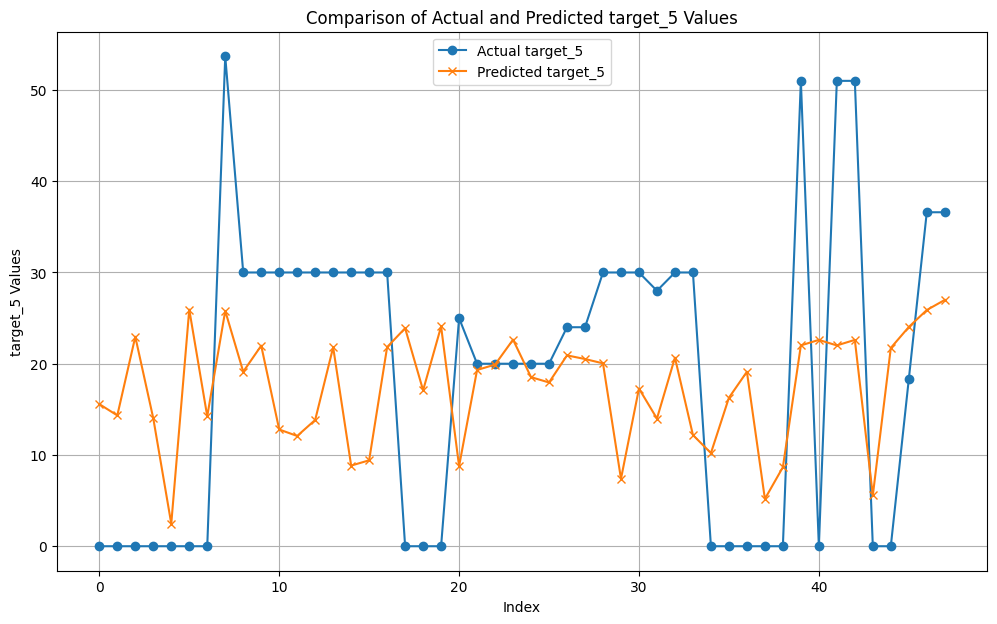

In [246]:
# Target_5
save_model_function(model, save_path, 'target_5')
model_evaluate('target_5', directory_path, save_path)

## target 6

In [247]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_6'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [248]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [249]:
y = y_default
X = X_standardized

In [250]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [251]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [252]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 1.8116 - mae: 1.0617 - mse: 1.8116 - rmse: 1.3265 - r2: 0.0100 - val_loss: 1.6137 - val_mae: 0.9998 - val_mse: 1.6137 - val_rmse: 1.2513 - val_r2: 0.0605
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 1.7069 - mae: 1.0323 - mse: 1.7069 - rmse: 1.2909 - r2: 0.0713 - val_loss: 1.5990 - val_mae: 1.0088 - val_mse: 1.5990 - val_rmse: 1.2476 - val_r2: 0.0557
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 1.6852 - mae: 1.0216 - mse: 1.6852 - rmse: 1.2834 - r2: 0.0876 - val_loss: 1.6206 - val_mae: 1.0578 - val_mse: 1.6206 - val_rmse: 1.2592 - val_r2: 0.0303
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 1.6570 - mae: 1.0129 - mse: 1.6570 - rmse: 1.2716 - r2: 0.1086 - val_loss: 1.5915 - val_mae: 1.0006 - val_mse: 1.5915 - val_rmse: 1.2435 - val_r2: 0.0639
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 1.6501 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_6.h5
2/2 [==============================] - 0s 3ms/step


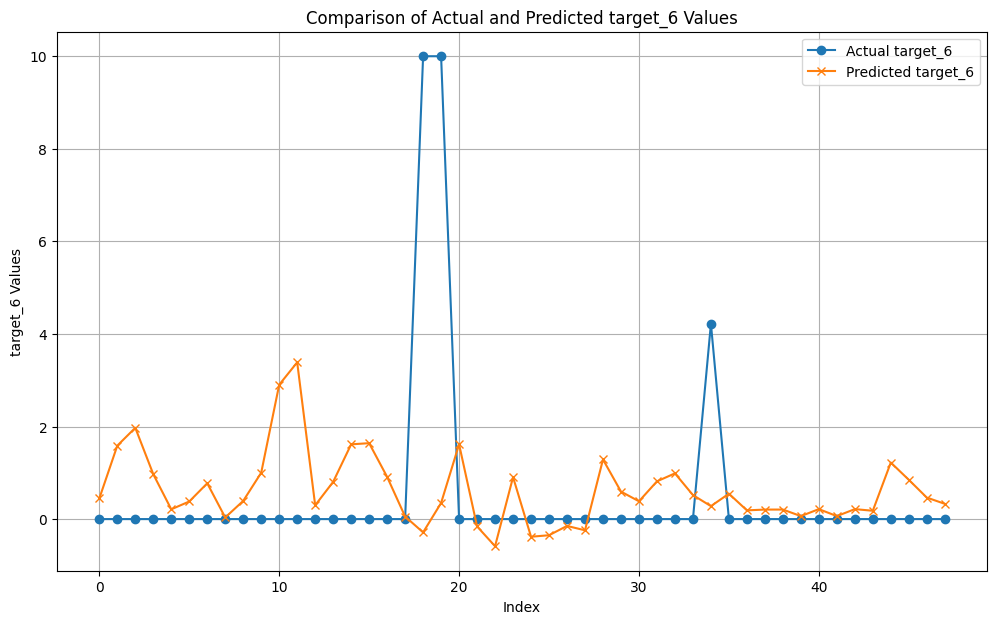

In [253]:
# Target_6
save_model_function(model, save_path, 'target_6')
model_evaluate('target_6', directory_path, save_path)

## target 7

In [254]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_7'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [255]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [256]:
y = y_default
X = X_standardized

In [257]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [258]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [259]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 7.1121 - mae: 2.0917 - mse: 7.1121 - rmse: 2.6313 - r2: -0.0258 - val_loss: 7.3714 - val_mae: 2.1789 - val_mse: 7.3714 - val_rmse: 2.6826 - val_r2: -0.0226
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 6.9095 - mae: 2.0626 - mse: 6.9095 - rmse: 2.5909 - r2: 0.0043 - val_loss: 7.2827 - val_mae: 2.1064 - val_mse: 7.2827 - val_rmse: 2.6597 - val_r2: 0.0019
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 6.8082 - mae: 2.0560 - mse: 6.8082 - rmse: 2.5716 - r2: 0.0104 - val_loss: 7.2283 - val_mae: 2.1288 - val_mse: 7.2283 - val_rmse: 2.6536 - val_r2: 0.0018
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 6.7848 - mae: 2.0478 - mse: 6.7848 - rmse: 2.5694 - r2: 0.0208 - val_loss: 7.1604 - val_mae: 2.1211 - val_mse: 7.1604 - val_rmse: 2.6405 - val_r2: 0.0108
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 6.7652 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_7.h5
2/2 [==============================] - 0s 2ms/step


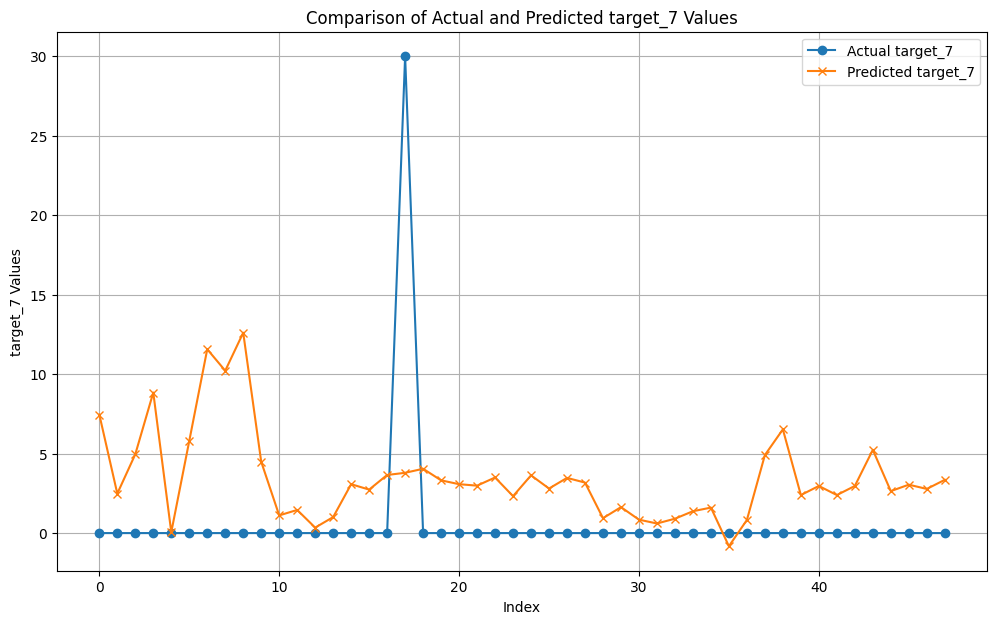

In [260]:
# Target_7
save_model_function(model, save_path, 'target_7')
model_evaluate('target_7', directory_path, save_path)

## target 8

In [261]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_8'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [262]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [263]:
y = y_default
X = X_standardized

In [264]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [265]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [266]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 19.5608 - mae: 3.4645 - mse: 19.5608 - rmse: 4.3467 - r2: 0.0992 - val_loss: 17.4954 - val_mae: 3.2473 - val_mse: 17.4954 - val_rmse: 4.1370 - val_r2: 0.1769
Epoch 2/150
250/250 [==============================] - 0s 1ms/step - loss: 16.7977 - mae: 3.2409 - mse: 16.7977 - rmse: 4.0628 - r2: 0.2165 - val_loss: 16.4534 - val_mae: 3.2071 - val_mse: 16.4534 - val_rmse: 4.0184 - val_r2: 0.2153
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 16.3621 - mae: 3.1920 - mse: 16.3621 - rmse: 4.0009 - r2: 0.2415 - val_loss: 16.5771 - val_mae: 3.2082 - val_mse: 16.5771 - val_rmse: 4.0297 - val_r2: 0.2160
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 16.3647 - mae: 3.1854 - mse: 16.3647 - rmse: 3.9982 - r2: 0.2400 - val_loss: 16.5715 - val_mae: 3.2375 - val_mse: 16.5715 - val_rmse: 4.0323 - val_r2: 0.2033
Epoch 5/150
250/250 [==============================] - 0s 2ms/step -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_8.h5
2/2 [==============================] - 0s 2ms/step


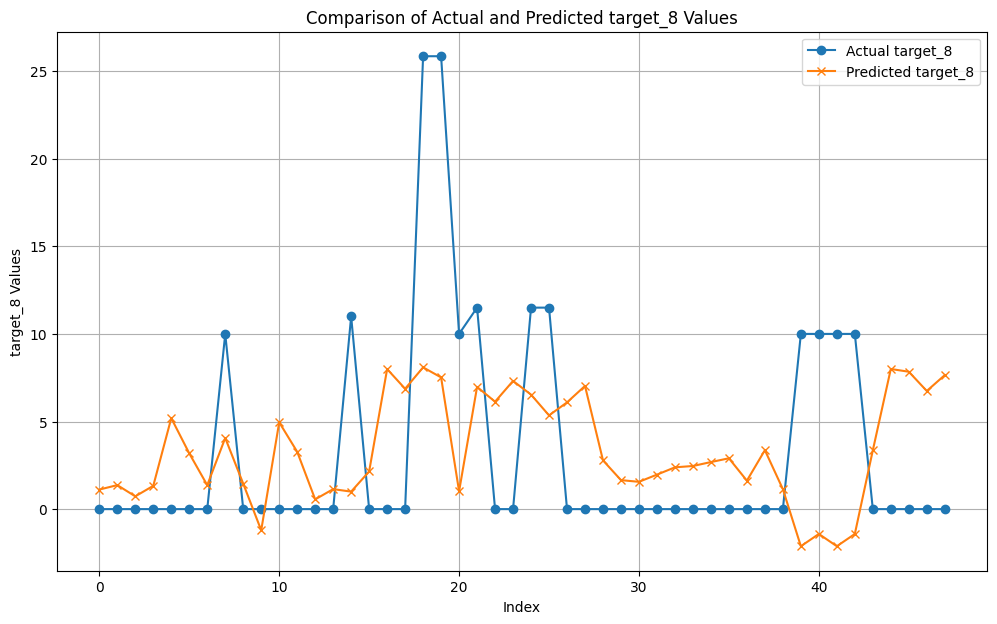

In [267]:
# Target_8
save_model_function(model, save_path, 'target_8')
model_evaluate('target_8', directory_path, save_path)

## target 9

In [268]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_9'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [269]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [270]:
y = y_default
X = X_standardized

In [271]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [272]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [273]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 0.9210 - mae: 0.7519 - mse: 0.9210 - rmse: 0.9482 - r2: 6.3498e-04 - val_loss: 0.8355 - val_mae: 0.7058 - val_mse: 0.8355 - val_rmse: 0.8980 - val_r2: 0.0297
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.8879 - mae: 0.7416 - mse: 0.8879 - rmse: 0.9310 - r2: 0.0411 - val_loss: 0.8474 - val_mae: 0.7374 - val_mse: 0.8474 - val_rmse: 0.9078 - val_r2: -0.0103
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.8773 - mae: 0.7380 - mse: 0.8773 - rmse: 0.9255 - r2: 0.0520 - val_loss: 0.8342 - val_mae: 0.7256 - val_mse: 0.8342 - val_rmse: 0.9000 - val_r2: 0.0141
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.8734 - mae: 0.7367 - mse: 0.8734 - rmse: 0.9231 - r2: 0.0531 - val_loss: 0.8475 - val_mae: 0.7435 - val_mse: 0.8475 - val_rmse: 0.9078 - val_r2: -0.0063
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.8

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_9.h5
2/2 [==============================] - 0s 3ms/step


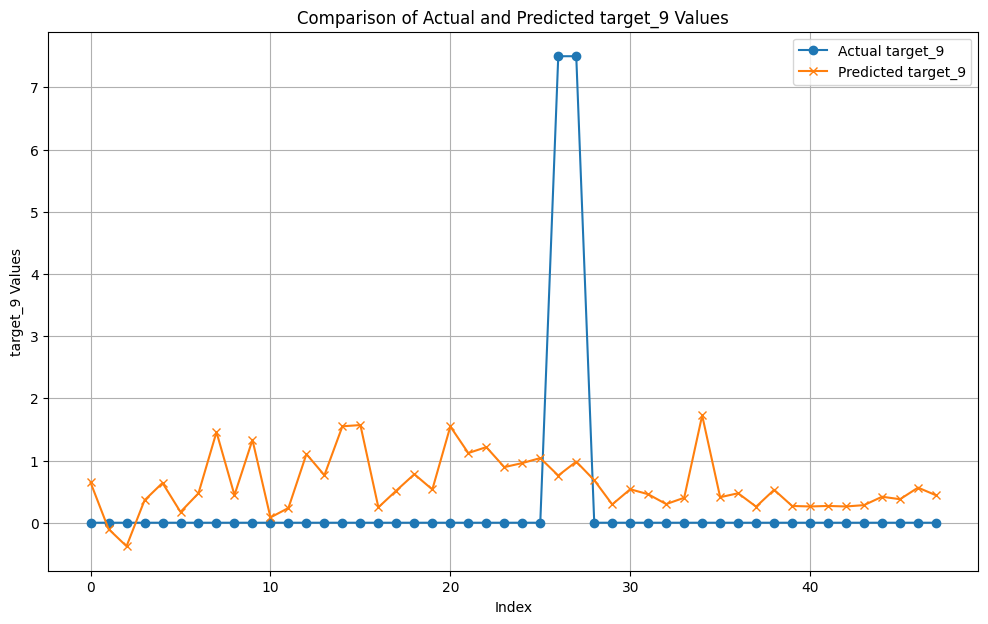

In [274]:
# Target_9
save_model_function(model, save_path, 'target_9')
model_evaluate('target_9', directory_path, save_path)

## target 10

In [275]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_10'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [276]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [277]:
y = y_default
X = X_standardized

In [278]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [279]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [280]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 1.0713 - mae: 0.8068 - mse: 1.0713 - rmse: 1.0207 - r2: -0.0175 - val_loss: 1.0858 - val_mae: 0.8364 - val_mse: 1.0858 - val_rmse: 1.0323 - val_r2: -0.0267
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 1.0276 - mae: 0.7950 - mse: 1.0276 - rmse: 1.0014 - r2: 0.0274 - val_loss: 1.0448 - val_mae: 0.8158 - val_mse: 1.0448 - val_rmse: 1.0113 - val_r2: 0.0239
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 1.0232 - mae: 0.7938 - mse: 1.0232 - rmse: 0.9967 - r2: 0.0227 - val_loss: 1.0552 - val_mae: 0.8238 - val_mse: 1.0552 - val_rmse: 1.0166 - val_r2: 0.0120
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 1.0104 - mae: 0.7905 - mse: 1.0104 - rmse: 0.9936 - r2: 0.0404 - val_loss: 1.0491 - val_mae: 0.8257 - val_mse: 1.0491 - val_rmse: 1.0138 - val_r2: 0.0174
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 1.0017 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_10.h5
2/2 [==============================] - 0s 2ms/step


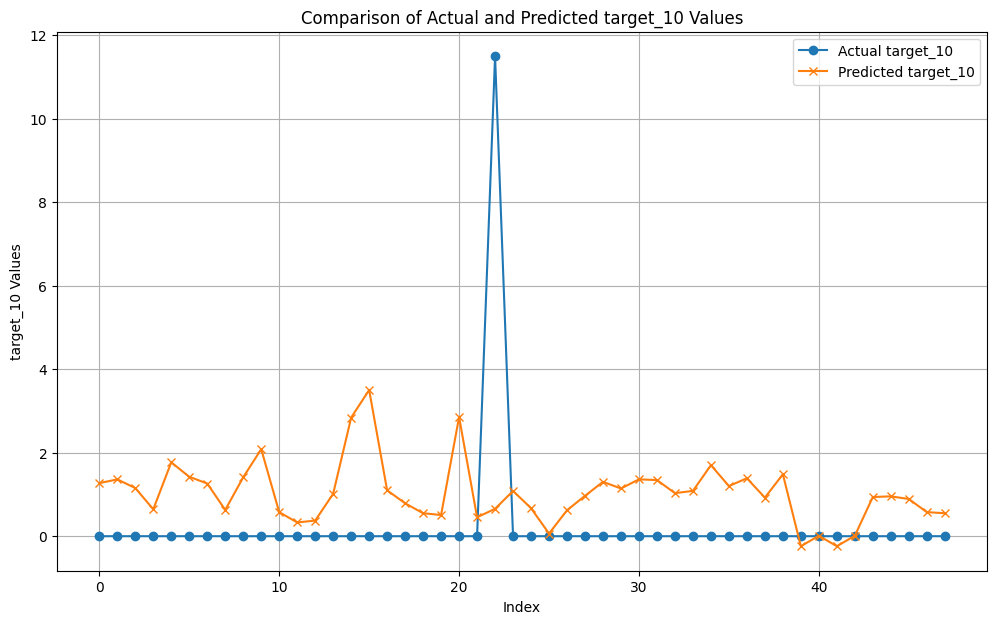

In [281]:
# Target_10
save_model_function(model, save_path, 'target_10')
model_evaluate('target_10', directory_path, save_path)

## target 11

In [282]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_11'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [283]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [284]:
y = y_default
X = X_standardized

In [285]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [286]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [287]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 1.2942 - mae: 0.8595 - mse: 1.2942 - rmse: 1.1107 - r2: 0.3450 - val_loss: 1.0843 - val_mae: 0.8054 - val_mse: 1.0843 - val_rmse: 1.0274 - val_r2: 0.4324
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 1.0279 - mae: 0.7560 - mse: 1.0279 - rmse: 1.0010 - r2: 0.4785 - val_loss: 1.0000 - val_mae: 0.7481 - val_mse: 1.0000 - val_rmse: 0.9861 - val_r2: 0.4868
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.9982 - mae: 0.7400 - mse: 0.9982 - rmse: 0.9846 - r2: 0.4863 - val_loss: 0.9800 - val_mae: 0.7314 - val_mse: 0.9800 - val_rmse: 0.9771 - val_r2: 0.4909
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.9669 - mae: 0.7253 - mse: 0.9669 - rmse: 0.9711 - r2: 0.5006 - val_loss: 0.9987 - val_mae: 0.7166 - val_mse: 0.9987 - val_rmse: 0.9831 - val_r2: 0.4814
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.9556 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_11.h5
2/2 [==============================] - 0s 2ms/step


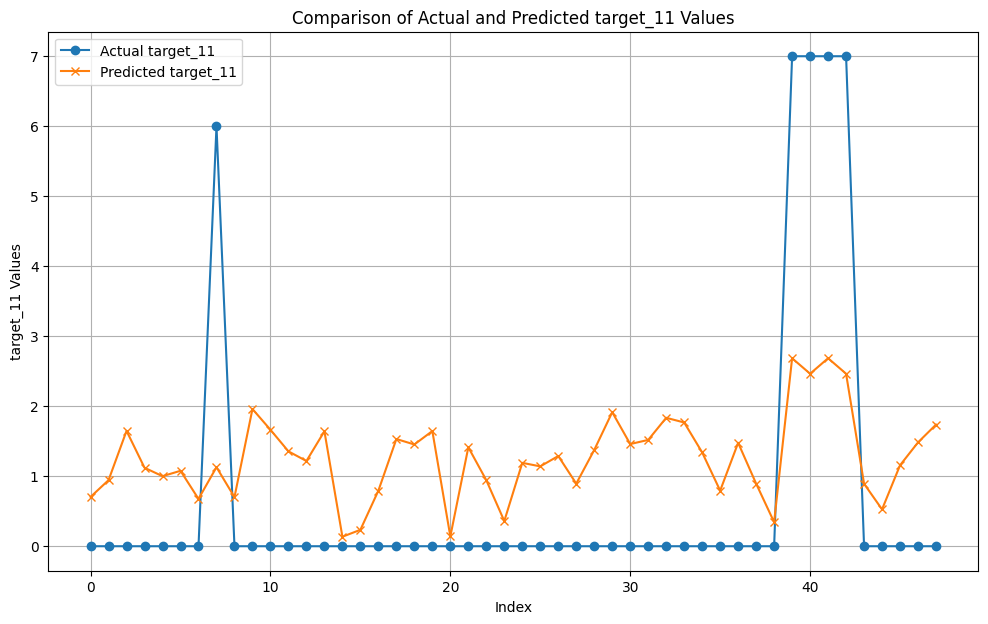

In [288]:
# Target_11
save_model_function(model, save_path, 'target_11')
model_evaluate('target_11', directory_path, save_path)

## target 12

In [289]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_12'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [290]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [291]:
y = y_default
X = X_standardized

In [292]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [293]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [294]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 0.1175 - mae: 0.2602 - mse: 0.1175 - rmse: 0.3385 - r2: 0.1954 - val_loss: 0.1012 - val_mae: 0.2397 - val_mse: 0.1012 - val_rmse: 0.3147 - val_r2: 0.2918
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1023 - mae: 0.2415 - mse: 0.1023 - rmse: 0.3159 - r2: 0.3002 - val_loss: 0.0989 - val_mae: 0.2342 - val_mse: 0.0989 - val_rmse: 0.3105 - val_r2: 0.3121
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0989 - mae: 0.2356 - mse: 0.0989 - rmse: 0.3099 - r2: 0.3269 - val_loss: 0.0980 - val_mae: 0.2402 - val_mse: 0.0980 - val_rmse: 0.3095 - val_r2: 0.3113
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0973 - mae: 0.2350 - mse: 0.0973 - rmse: 0.3084 - r2: 0.3375 - val_loss: 0.0955 - val_mae: 0.2317 - val_mse: 0.0955 - val_rmse: 0.3056 - val_r2: 0.3262
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0951 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_12.h5
2/2 [==============================] - 0s 1ms/step


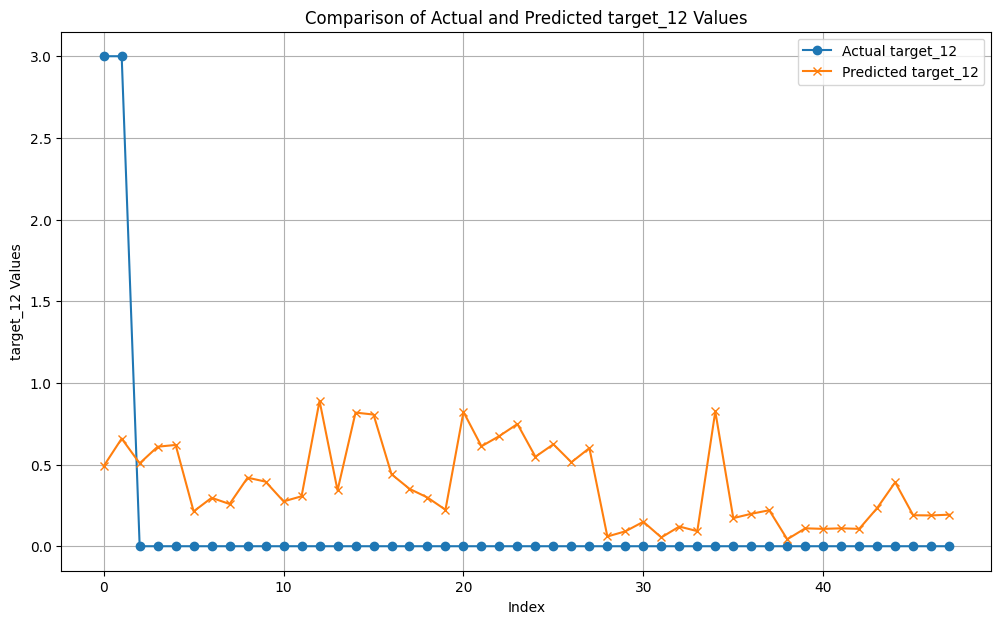

In [295]:
# Target_12
save_model_function(model, save_path, 'target_12')
model_evaluate('target_12', directory_path, save_path)

## target 13

In [296]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_13'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [297]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [298]:
y = y_default
X = X_standardized

In [299]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [300]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [301]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 0.1719 - mae: 0.3110 - mse: 0.1719 - rmse: 0.4045 - r2: 0.2360 - val_loss: 0.1416 - val_mae: 0.2672 - val_mse: 0.1416 - val_rmse: 0.3712 - val_r2: 0.3905
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1387 - mae: 0.2757 - mse: 0.1387 - rmse: 0.3666 - r2: 0.3854 - val_loss: 0.1382 - val_mae: 0.2800 - val_mse: 0.1382 - val_rmse: 0.3675 - val_r2: 0.3960
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1371 - mae: 0.2746 - mse: 0.1371 - rmse: 0.3657 - r2: 0.3850 - val_loss: 0.1378 - val_mae: 0.2794 - val_mse: 0.1378 - val_rmse: 0.3675 - val_r2: 0.3956
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1337 - mae: 0.2707 - mse: 0.1337 - rmse: 0.3611 - r2: 0.4060 - val_loss: 0.1339 - val_mae: 0.2639 - val_mse: 0.1339 - val_rmse: 0.3611 - val_r2: 0.4225
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1320 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_13.h5
2/2 [==============================] - 0s 3ms/step


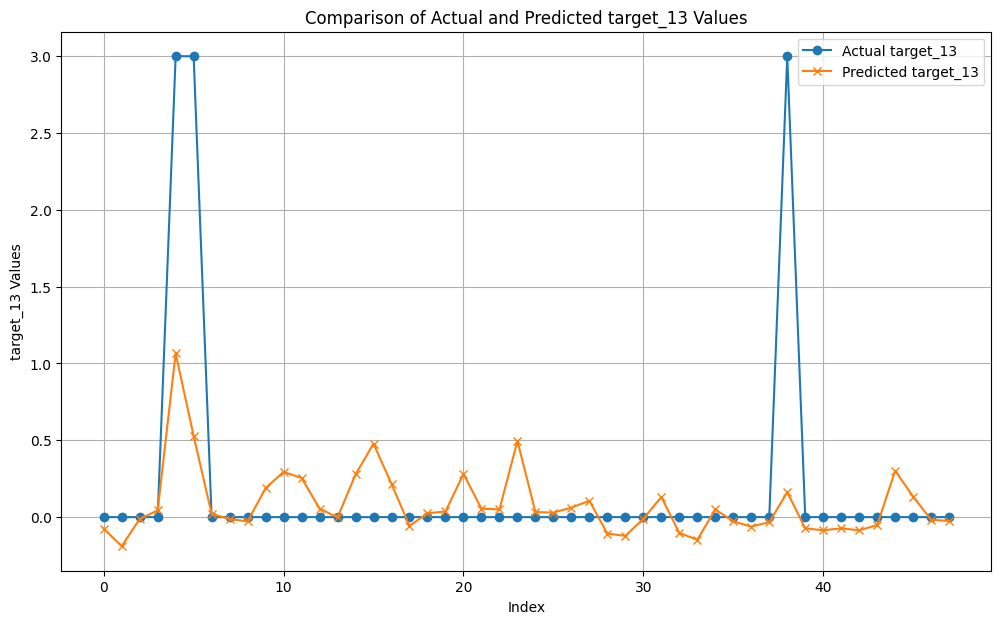

In [302]:
# Target_13
save_model_function(model, save_path, 'target_13')
model_evaluate('target_13', directory_path, save_path)

## target 14

In [303]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_14'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [304]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [305]:
y = y_default
X = X_standardized

In [306]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [307]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [308]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 3ms/step - loss: 0.8741 - mae: 0.7446 - mse: 0.8741 - rmse: 0.9224 - r2: 0.3471 - val_loss: 0.7302 - val_mae: 0.6838 - val_mse: 0.7302 - val_rmse: 0.8493 - val_r2: 0.4161
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 0.7271 - mae: 0.6808 - mse: 0.7271 - rmse: 0.8459 - r2: 0.4544 - val_loss: 0.7091 - val_mae: 0.6687 - val_mse: 0.7091 - val_rmse: 0.8362 - val_r2: 0.4359
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.7087 - mae: 0.6721 - mse: 0.7087 - rmse: 0.8345 - r2: 0.4718 - val_loss: 0.7097 - val_mae: 0.6561 - val_mse: 0.7097 - val_rmse: 0.8364 - val_r2: 0.4323
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.6921 - mae: 0.6638 - mse: 0.6921 - rmse: 0.8257 - r2: 0.4771 - val_loss: 0.7027 - val_mae: 0.6623 - val_mse: 0.7027 - val_rmse: 0.8330 - val_r2: 0.4408
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.6928 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_14.h5
2/2 [==============================] - 0s 3ms/step


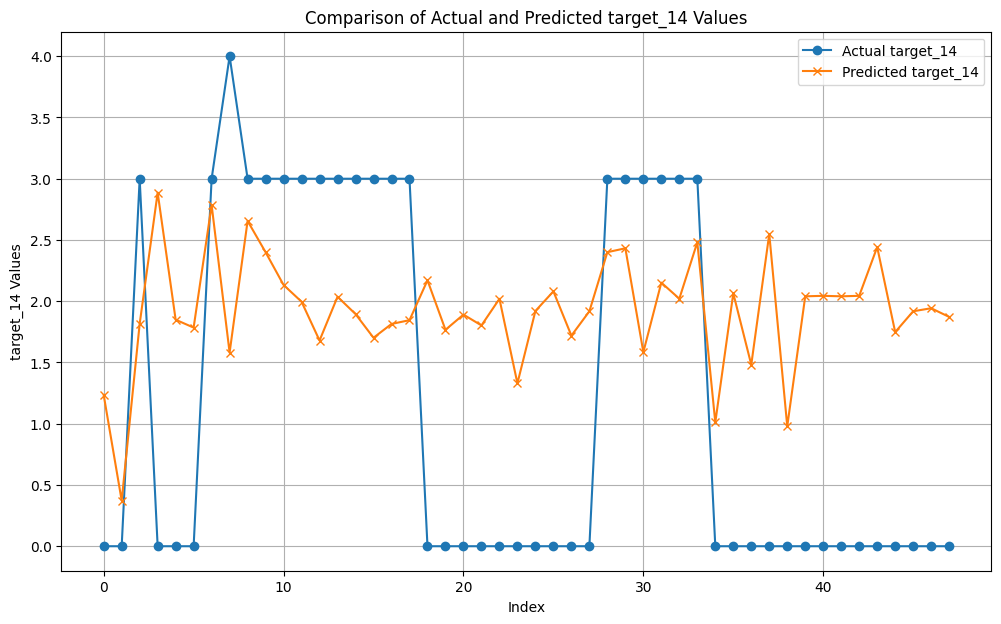

In [309]:
# Target_14
save_model_function(model, save_path, 'target_14')
model_evaluate('target_14', directory_path, save_path)

## target 15

In [310]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_15'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [311]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [312]:
y = y_default
X = X_standardized

In [313]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [314]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [315]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 3ms/step - loss: 1.0882 - mae: 0.8228 - mse: 1.0882 - rmse: 1.0309 - r2: 0.2669 - val_loss: 0.9193 - val_mae: 0.7458 - val_mse: 0.9193 - val_rmse: 0.9506 - val_r2: 0.3460
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.9388 - mae: 0.7618 - mse: 0.9388 - rmse: 0.9600 - r2: 0.3645 - val_loss: 0.9180 - val_mae: 0.7397 - val_mse: 0.9180 - val_rmse: 0.9496 - val_r2: 0.3530
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.9097 - mae: 0.7467 - mse: 0.9097 - rmse: 0.9437 - r2: 0.3815 - val_loss: 0.9136 - val_mae: 0.7530 - val_mse: 0.9136 - val_rmse: 0.9473 - val_r2: 0.3538
Epoch 4/150
250/250 [==============================] - 1s 2ms/step - loss: 0.8962 - mae: 0.7417 - mse: 0.8962 - rmse: 0.9385 - r2: 0.3961 - val_loss: 0.8925 - val_mae: 0.7442 - val_mse: 0.8925 - val_rmse: 0.9379 - val_r2: 0.3581
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.8832 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_15.h5
2/2 [==============================] - 0s 2ms/step


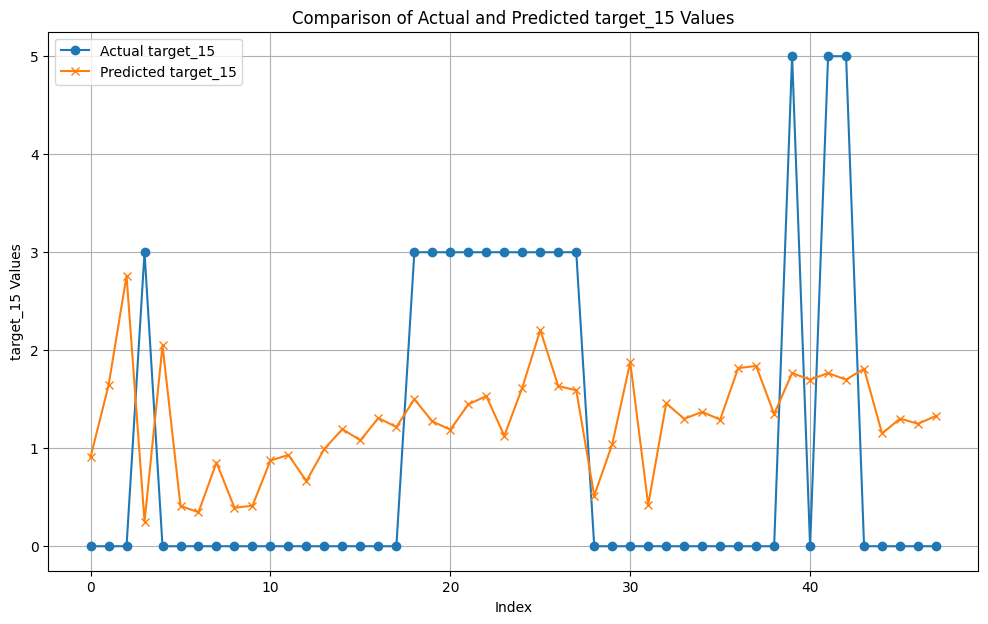

In [316]:
# Target_15
save_model_function(model, save_path, 'target_15')
model_evaluate('target_15', directory_path, save_path)

## target 16

In [317]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_16'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [318]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [319]:
y = y_default
X = X_standardized

In [320]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [321]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [322]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 15.6306 - mae: 2.8949 - mse: 15.6306 - rmse: 3.8370 - r2: 0.3579 - val_loss: 12.6158 - val_mae: 2.5005 - val_mse: 12.6158 - val_rmse: 3.4867 - val_r2: 0.4971
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 11.5461 - mae: 2.4444 - mse: 11.5461 - rmse: 3.3467 - r2: 0.5214 - val_loss: 12.0309 - val_mae: 2.4865 - val_mse: 12.0309 - val_rmse: 3.4092 - val_r2: 0.5169
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 10.9847 - mae: 2.3865 - mse: 10.9847 - rmse: 3.2631 - r2: 0.5398 - val_loss: 11.9340 - val_mae: 2.4083 - val_mse: 11.9340 - val_rmse: 3.3880 - val_r2: 0.5245
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 10.7520 - mae: 2.3447 - mse: 10.7520 - rmse: 3.2279 - r2: 0.5461 - val_loss: 11.7650 - val_mae: 2.4879 - val_mse: 11.7650 - val_rmse: 3.3811 - val_r2: 0.5222
Epoch 5/150
250/250 [==============================] - 0s 2ms/step -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_16.h5
2/2 [==============================] - 0s 2ms/step


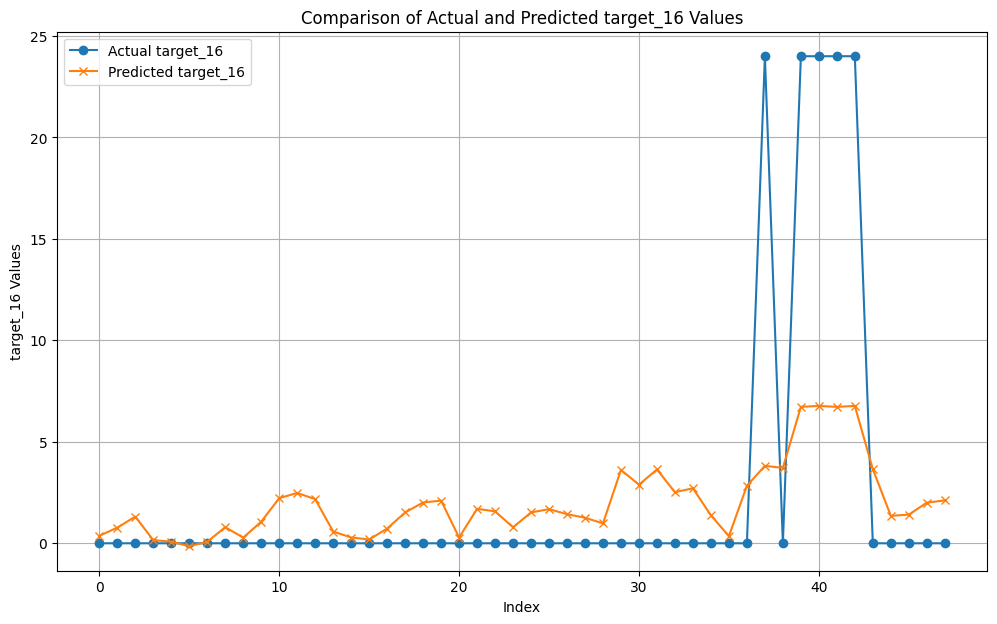

In [323]:
# Target_16
save_model_function(model, save_path, 'target_16')
model_evaluate('target_16', directory_path, save_path)

## target 17

In [324]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_17'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [325]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [326]:
y = y_default
X = X_standardized

In [327]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [328]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [329]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 3ms/step - loss: 69.8190 - mae: 6.8285 - mse: 69.8190 - rmse: 8.0979 - r2: 0.0136 - val_loss: 46.5173 - val_mae: 5.6985 - val_mse: 46.5173 - val_rmse: 6.7979 - val_r2: 0.3111
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 45.7890 - mae: 5.5938 - mse: 45.7890 - rmse: 6.7302 - r2: 0.3483 - val_loss: 44.6232 - val_mae: 5.4919 - val_mse: 44.6232 - val_rmse: 6.6572 - val_r2: 0.3395
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 43.9529 - mae: 5.4470 - mse: 43.9529 - rmse: 6.5932 - r2: 0.3782 - val_loss: 43.2590 - val_mae: 5.4055 - val_mse: 43.2590 - val_rmse: 6.5515 - val_r2: 0.3602
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 43.1585 - mae: 5.3792 - mse: 43.1585 - rmse: 6.5315 - r2: 0.3885 - val_loss: 42.9201 - val_mae: 5.4080 - val_mse: 42.9201 - val_rmse: 6.5249 - val_r2: 0.3673
Epoch 5/150
250/250 [==============================] - 0s 2ms/step -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_17.h5
2/2 [==============================] - 0s 2ms/step


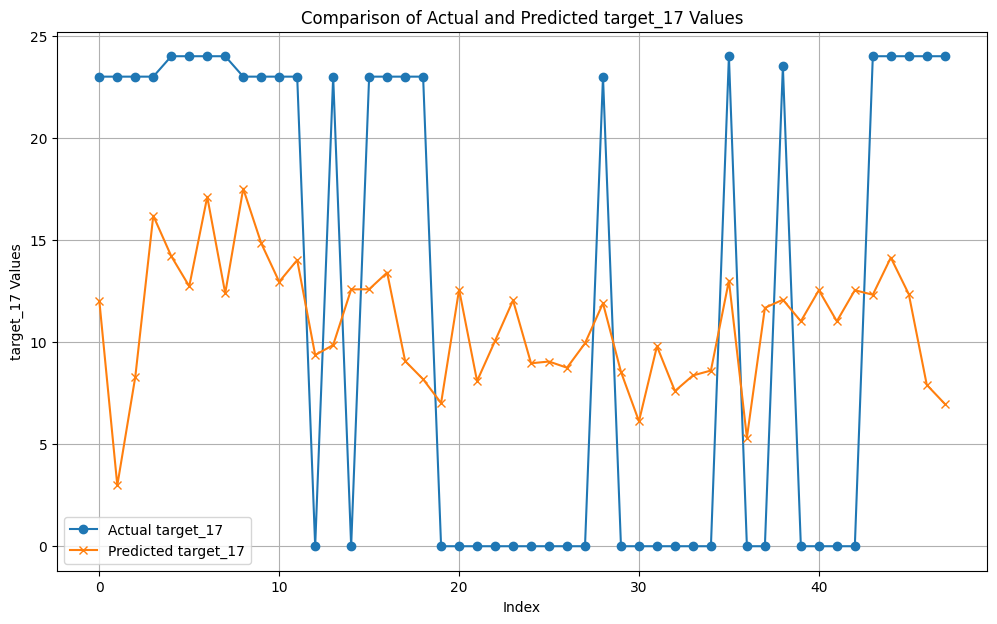

In [330]:
# Target_17
save_model_function(model, save_path, 'target_17')
model_evaluate('target_17', directory_path, save_path)

## target 18

In [331]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_18'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [332]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [333]:
y = y_default
X = X_standardized

In [334]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [335]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [336]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 3.4188 - mae: 1.4153 - mse: 3.4188 - rmse: 1.8245 - r2: 0.1490 - val_loss: 3.3301 - val_mae: 1.4215 - val_mse: 3.3301 - val_rmse: 1.8027 - val_r2: 0.1392
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 3.0451 - mae: 1.3194 - mse: 3.0451 - rmse: 1.7230 - r2: 0.2339 - val_loss: 3.1930 - val_mae: 1.3189 - val_mse: 3.1930 - val_rmse: 1.7534 - val_r2: 0.2032
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 3.0126 - mae: 1.3052 - mse: 3.0126 - rmse: 1.7137 - r2: 0.2373 - val_loss: 3.1727 - val_mae: 1.3304 - val_mse: 3.1727 - val_rmse: 1.7528 - val_r2: 0.2045
Epoch 4/150
250/250 [==============================] - 1s 2ms/step - loss: 2.9692 - mae: 1.3003 - mse: 2.9692 - rmse: 1.7020 - r2: 0.2444 - val_loss: 3.2628 - val_mae: 1.3832 - val_mse: 3.2628 - val_rmse: 1.7821 - val_r2: 0.1578
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 2.9564 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_18.h5
2/2 [==============================] - 0s 2ms/step


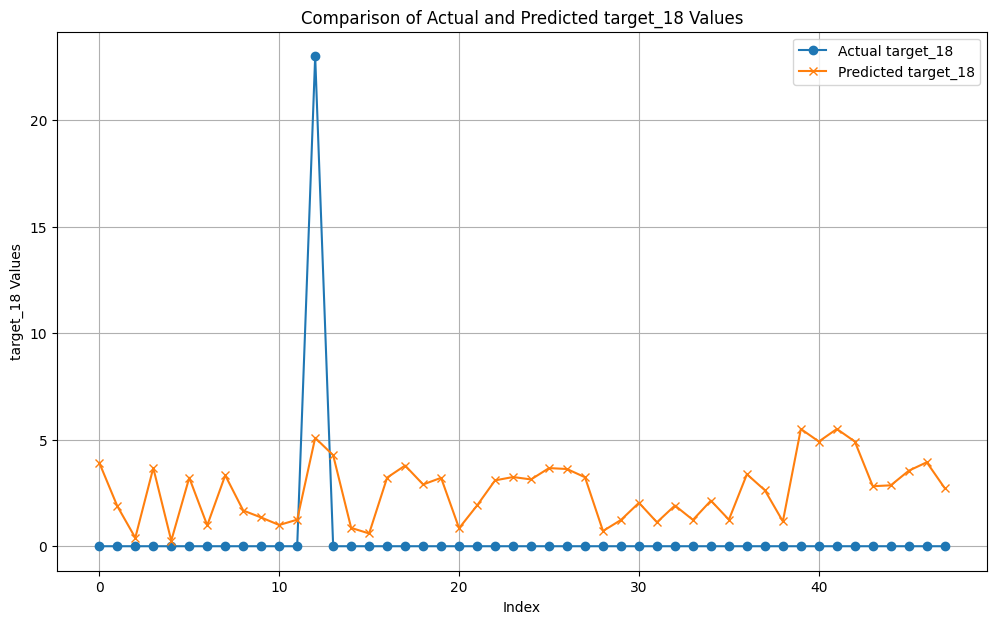

In [337]:
# Target_18
save_model_function(model, save_path, 'target_18')
model_evaluate('target_18', directory_path, save_path)

## target 19

In [338]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_19'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [339]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [340]:
y = y_default
X = X_standardized

In [341]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [342]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [343]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 17.0497 - mae: 3.0344 - mse: 17.0497 - rmse: 3.9726 - r2: 0.5368 - val_loss: 12.0460 - val_mae: 2.6572 - val_mse: 12.0460 - val_rmse: 3.4326 - val_r2: 0.6822
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 2.4172 - mse: 10.6919 - rmse: 3.2347 - r2: 0.7039 - val_loss: 11.3699 - val_mae: 2.4663 - val_mse: 11.3699 - val_rmse: 3.3307 - val_r2: 0.6991
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 10.3734 - mae: 2.3708 - mse: 10.3734 - rmse: 3.1823 - r2: 0.7133 - val_loss: 11.0385 - val_mae: 2.4790 - val_mse: 11.0385 - val_rmse: 3.2809 - val_r2: 0.7116
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 10.0676 - mae: 2.3237 - mse: 10.0676 - rmse: 3.1353 - r2: 0.7242 - val_loss: 11.1997 - val_mae: 2.4935 - val_mse: 11.1997 - val_rmse: 3.3067 - val_r2: 0.7020
Epoch 5/150
250/250 [==============================] - 0s 2ms/step -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_19.h5
2/2 [==============================] - 0s 2ms/step


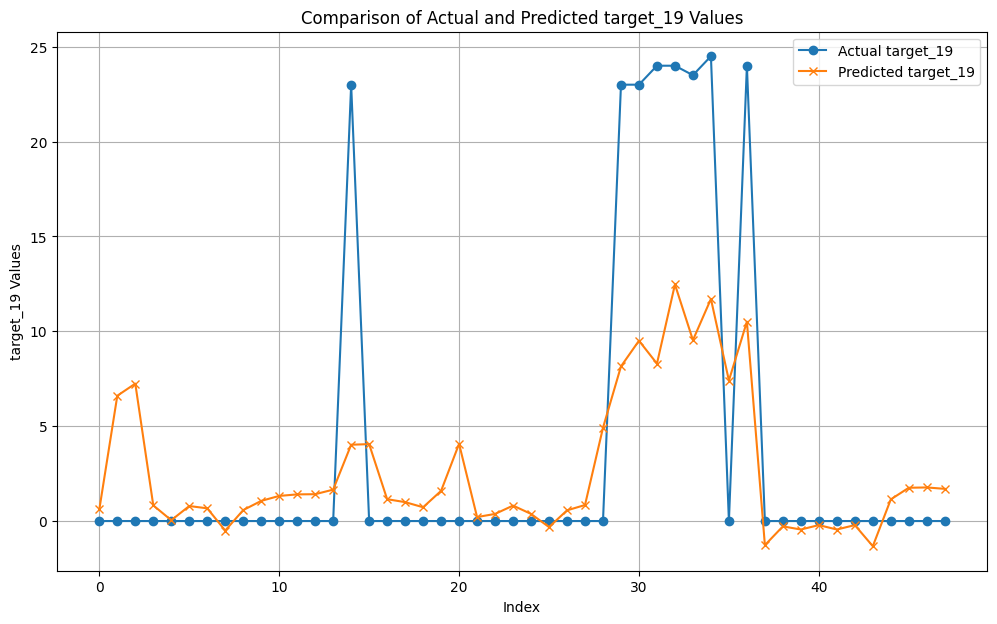

In [344]:
# Target_19
save_model_function(model, save_path, 'target_19')
model_evaluate('target_19', directory_path, save_path)

## target 20

In [345]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_20'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [346]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [347]:
y = y_default
X = X_standardized

In [348]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [349]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [350]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 28.0222 - mae: 4.1289 - mse: 28.0222 - rmse: 5.2163 - r2: 0.1828 - val_loss: 25.4999 - val_mae: 3.9838 - val_mse: 25.4999 - val_rmse: 5.0066 - val_r2: 0.2826
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 24.8124 - mae: 3.8814 - mse: 24.8124 - rmse: 4.9409 - r2: 0.2724 - val_loss: 25.1500 - val_mae: 3.8961 - val_mse: 25.1500 - val_rmse: 4.9700 - val_r2: 0.2981
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 24.4467 - mae: 3.8564 - mse: 24.4467 - rmse: 4.8986 - r2: 0.2822 - val_loss: 25.6290 - val_mae: 3.8196 - val_mse: 25.6290 - val_rmse: 5.0119 - val_r2: 0.2886
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 24.1424 - mae: 3.8275 - mse: 24.1424 - rmse: 4.8671 - r2: 0.3056 - val_loss: 24.4633 - val_mae: 3.8657 - val_mse: 24.4633 - val_rmse: 4.9070 - val_r2: 0.3114
Epoch 5/150
250/250 [==============================] - 0s 2ms/step -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_20.h5
2/2 [==============================] - 0s 2ms/step


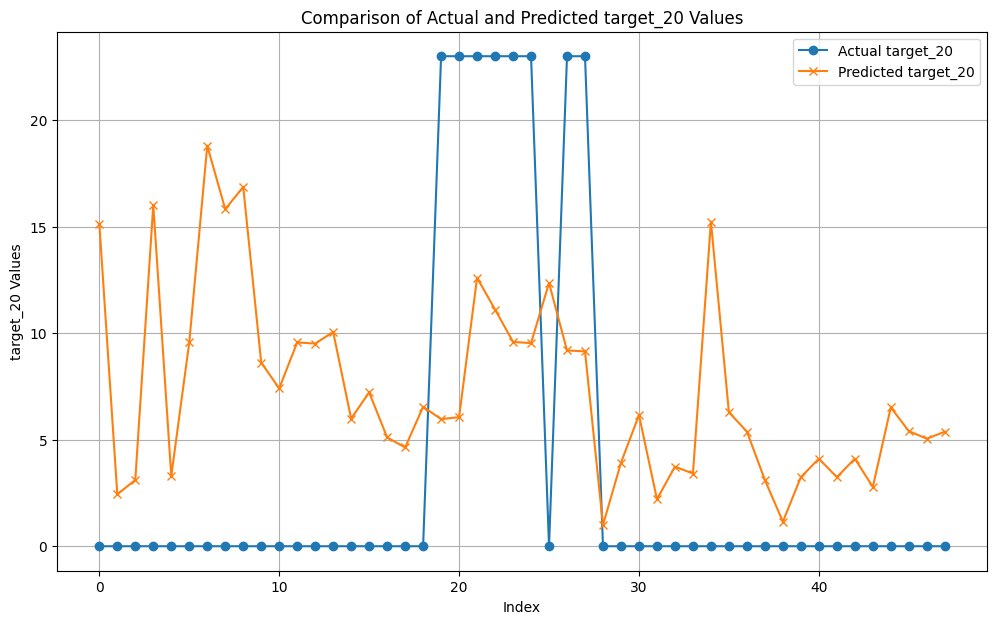

In [351]:
# Target_20
save_model_function(model, save_path, 'target_20')
model_evaluate('target_20', directory_path, save_path)

## target 21

In [352]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_21'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [353]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [354]:
y = y_default
X = X_standardized

In [355]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [356]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [357]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 4.0686 - mae: 1.5597 - mse: 4.0686 - rmse: 1.9870 - r2: 0.0143 - val_loss: 3.9405 - val_mae: 1.5374 - val_mse: 3.9405 - val_rmse: 1.9594 - val_r2: 0.0528
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 3.8756 - mae: 1.5209 - mse: 3.8756 - rmse: 1.9434 - r2: 0.0626 - val_loss: 3.9632 - val_mae: 1.5879 - val_mse: 3.9632 - val_rmse: 1.9692 - val_r2: 0.0299
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 3.7833 - mae: 1.5052 - mse: 3.7833 - rmse: 1.9189 - r2: 0.0906 - val_loss: 3.8225 - val_mae: 1.5130 - val_mse: 3.8225 - val_rmse: 1.9291 - val_r2: 0.0761
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 3.7516 - mae: 1.4976 - mse: 3.7516 - rmse: 1.9102 - r2: 0.0808 - val_loss: 3.8397 - val_mae: 1.5133 - val_mse: 3.8397 - val_rmse: 1.9339 - val_r2: 0.0726
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 3.7173 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_21.h5
2/2 [==============================] - 0s 3ms/step


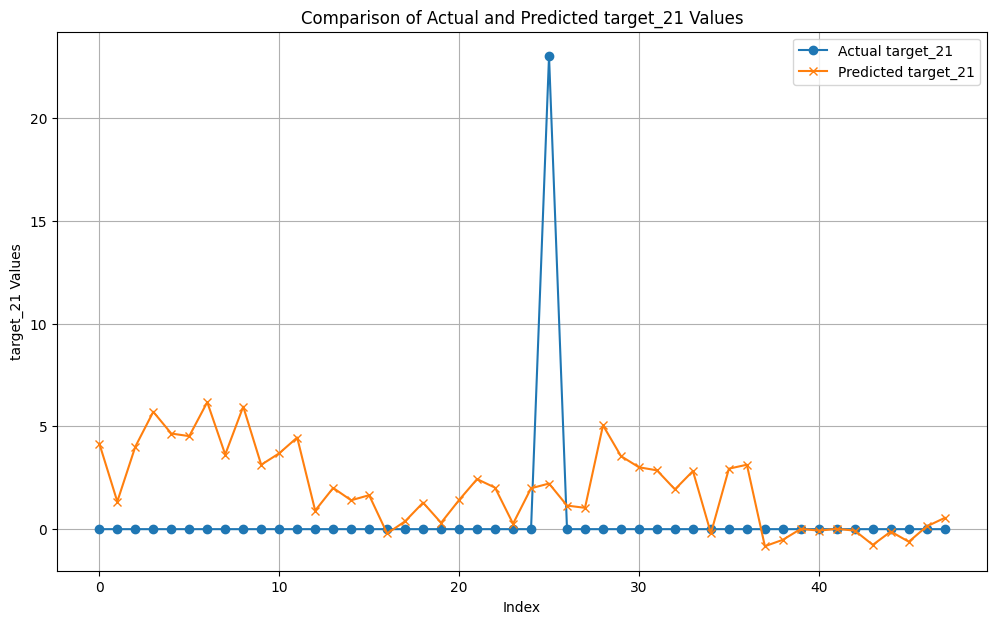

In [358]:
# Target_21
save_model_function(model, save_path, 'target_21')
model_evaluate('target_21', directory_path, save_path)

## target 22 - v2

In [359]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_22'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [360]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [361]:
y = y_default
X = X_standardized

In [362]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

# Количество входных признаков
input_features = X.shape[1]

# Создаем модель
model = Sequential()

# Добавляем слои
model.add(Dense(256, input_dim=input_features, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Нормализация данных после первого слоя
model.add(Dropout(0.3))  # Применяем Dropout для снижения переобучения

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Выходной слой
model.add(Dense(1, activation='linear'))


In [363]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [364]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 2s 3ms/step - loss: 3.1395 - mae: 0.5571 - mse: 0.5509 - rmse: 0.7055 - r2: -176276800.0000 - val_loss: 2.2620 - val_mae: 0.0985 - val_mse: 0.0146 - val_rmse: 0.1199 - val_r2: -4647269.0000
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 2.0197 - mae: 0.2789 - mse: 0.1353 - rmse: 0.3594 - r2: -43282964.0000 - val_loss: 1.5338 - val_mae: 0.0520 - val_mse: 0.0043 - val_rmse: 0.0654 - val_r2: -1380781.0000
Epoch 3/150
250/250 [==============================] - 1s 2ms/step - loss: 1.2706 - mae: 0.1618 - mse: 0.0470 - rmse: 0.2114 - r2: -15046489.0000 - val_loss: 0.9470 - val_mae: 0.0313 - val_mse: 0.0016 - val_rmse: 0.0397 - val_r2: -508200.4375
Epoch 4/150
250/250 [==============================] - 1s 2ms/step - loss: 0.7468 - mae: 0.0887 - mse: 0.0149 - rmse: 0.1186 - r2: -4777294.5000 - val_loss: 0.5468 - val_mae: 0.0173 - val_mse: 5.0310e-04 - val_rmse: 0.0222 - val_r2: -159713.7812
Epoch 5/150
250/250 [=

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_22.h5
2/2 [==============================] - 0s 3ms/step


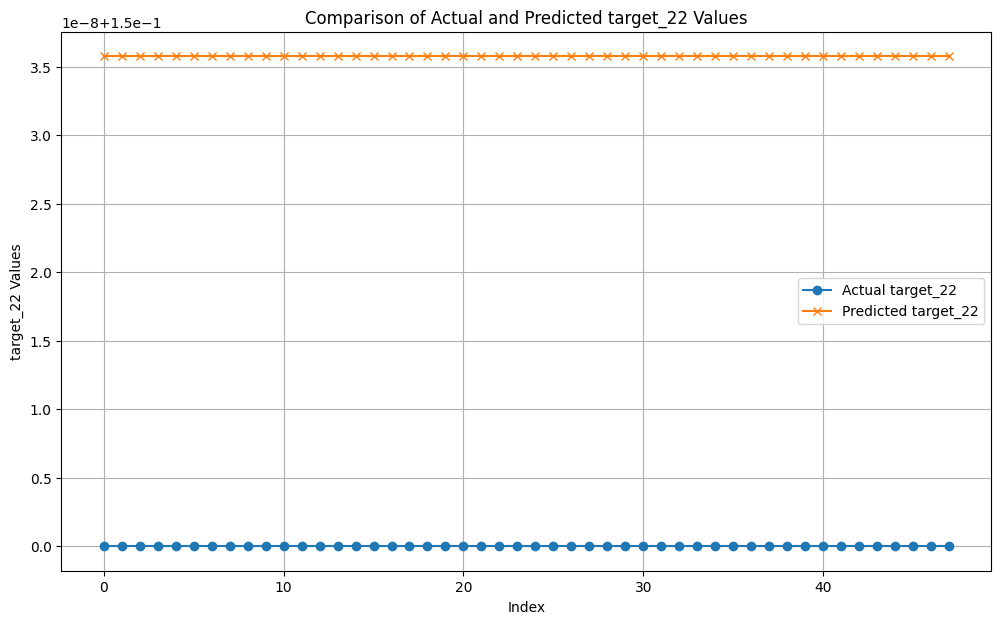

In [365]:
# Target_22
save_model_function(model, save_path, 'target_22')
model_evaluate('target_22', directory_path, save_path)

## target 23 - v2

In [366]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_23'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [367]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [368]:
y = y_default
X = X_standardized

In [369]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

# Количество входных признаков
input_features = X.shape[1]

# Создаем модель
model = Sequential()

# Добавляем слои
model.add(Dense(256, input_dim=input_features, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Нормализация данных после первого слоя
model.add(Dropout(0.3))  # Применяем Dropout для снижения переобучения

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Выходной слой
model.add(Dense(1, activation='linear'))


In [370]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [371]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 2s 3ms/step - loss: 3.2215 - mae: 0.5837 - mse: 0.6217 - rmse: 0.7437 - r2: -198948272.0000 - val_loss: 2.3170 - val_mae: 0.0970 - val_mse: 0.0154 - val_rmse: 0.1227 - val_r2: -4875246.5000
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 2.1264 - mae: 0.3012 - mse: 0.1574 - rmse: 0.3880 - r2: -50375676.0000 - val_loss: 1.6412 - val_mae: 0.0526 - val_mse: 0.0045 - val_rmse: 0.0663 - val_r2: -1422872.7500
Epoch 3/150
250/250 [==============================] - 1s 2ms/step - loss: 1.3923 - mae: 0.1736 - mse: 0.0541 - rmse: 0.2270 - r2: -17326442.0000 - val_loss: 1.0622 - val_mae: 0.0273 - val_mse: 0.0012 - val_rmse: 0.0344 - val_r2: -383859.0312
Epoch 4/150
250/250 [==============================] - 1s 2ms/step - loss: 0.8565 - mae: 0.0972 - mse: 0.0177 - rmse: 0.1295 - r2: -5671257.0000 - val_loss: 0.6426 - val_mae: 0.0251 - val_mse: 8.6330e-04 - val_rmse: 0.0293 - val_r2: -274063.9375
Epoch 5/150
250/250 [=

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_23.h5
2/2 [==============================] - 0s 2ms/step


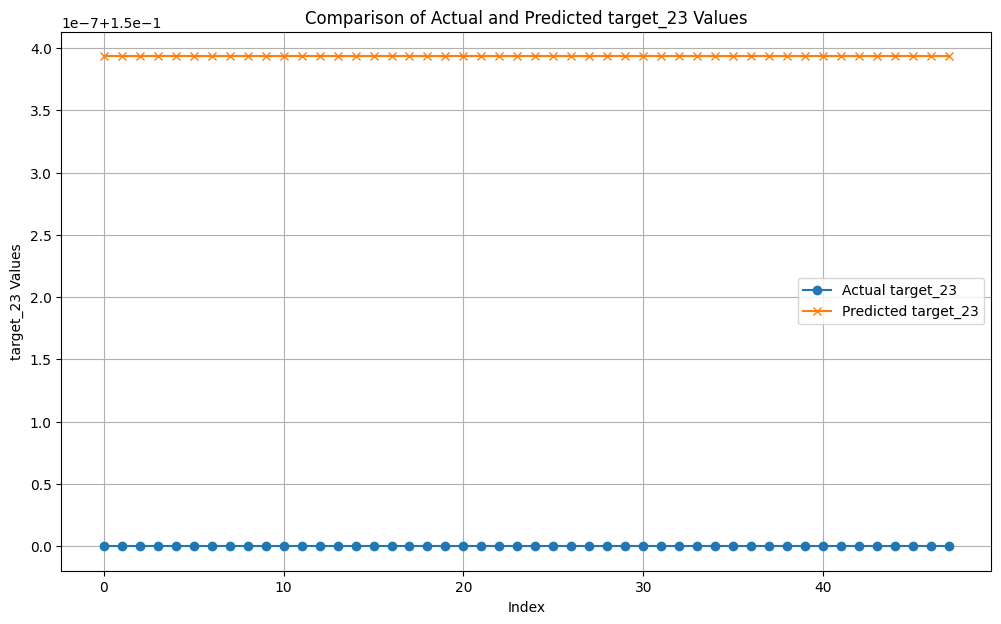

In [372]:
# Target_23
save_model_function(model, save_path, 'target_23')
model_evaluate('target_23', directory_path, save_path)

## target 24 - v2

In [373]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_24'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [374]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [375]:
y = y_default
X = X_standardized

In [376]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

# Количество входных признаков
input_features = X.shape[1]

# Создаем модель
model = Sequential()

# Добавляем слои
model.add(Dense(256, input_dim=input_features, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Нормализация данных после первого слоя
model.add(Dropout(0.3))  # Применяем Dropout для снижения переобучения

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Выходной слой
model.add(Dense(1, activation='linear'))


In [377]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])

In [378]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 2s 3ms/step - loss: 3.0646 - mae: 0.5401 - mse: 0.5105 - rmse: 0.6837 - r2: -163367856.0000 - val_loss: 2.2151 - val_mae: 0.1168 - val_mse: 0.0198 - val_rmse: 0.1400 - val_r2: -6297391.0000
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 1.9486 - mae: 0.2742 - mse: 0.1313 - rmse: 0.3532 - r2: -42027440.0000 - val_loss: 1.4568 - val_mae: 0.0533 - val_mse: 0.0049 - val_rmse: 0.0691 - val_r2: -1545767.1250
Epoch 3/150
250/250 [==============================] - 1s 3ms/step - loss: 1.1904 - mae: 0.1569 - mse: 0.0451 - rmse: 0.2065 - r2: -14439688.0000 - val_loss: 0.8710 - val_mae: 0.0227 - val_mse: 8.1814e-04 - val_rmse: 0.0283 - val_r2: -259725.6406
Epoch 4/150
250/250 [==============================] - 1s 3ms/step - loss: 0.6792 - mae: 0.0881 - mse: 0.0146 - rmse: 0.1175 - r2: -4662963.0000 - val_loss: 0.4886 - val_mae: 0.0113 - val_mse: 2.2434e-04 - val_rmse: 0.0147 - val_r2: -71216.4844
Epoch 5/150
250/250

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_24.h5
2/2 [==============================] - 0s 2ms/step


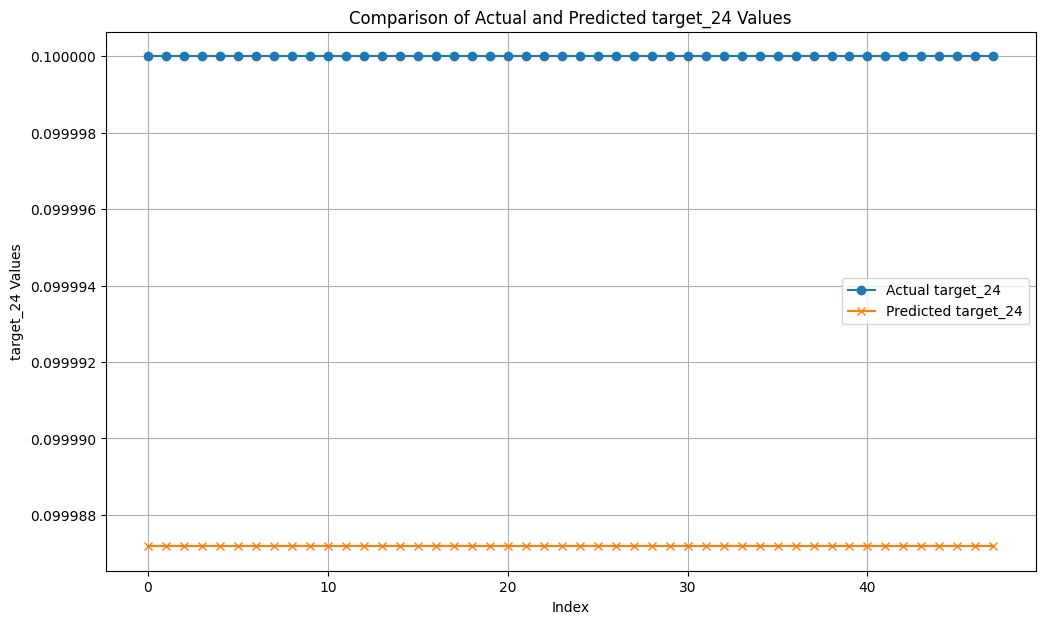

In [379]:
# Target_24
save_model_function(model, save_path, 'target_24')
model_evaluate('target_24', directory_path, save_path)

## target 25 - v2

In [380]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_25'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [381]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [382]:
y = y_default
X = X_standardized

In [383]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

# Количество входных признаков
input_features = X.shape[1]

# Создаем модель
model = Sequential()

# Добавляем слои
model.add(Dense(256, input_dim=input_features, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Нормализация данных после первого слоя
model.add(Dropout(0.3))  # Применяем Dropout для снижения переобучения

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Выходной слой
model.add(Dense(1, activation='linear'))


In [384]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [385]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 2s 3ms/step - loss: 3.4108 - mae: 0.6495 - mse: 0.7496 - rmse: 0.8242 - r2: -239881376.0000 - val_loss: 2.4236 - val_mae: 0.1496 - val_mse: 0.0320 - val_rmse: 0.1782 - val_r2: -10147996.0000
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 2.2914 - mae: 0.3450 - mse: 0.2075 - rmse: 0.4468 - r2: -66399372.0000 - val_loss: 1.7799 - val_mae: 0.0698 - val_mse: 0.0075 - val_rmse: 0.0858 - val_r2: -2381416.5000
Epoch 3/150
250/250 [==============================] - 1s 2ms/step - loss: 1.5657 - mae: 0.2132 - mse: 0.0822 - rmse: 0.2800 - r2: -26295110.0000 - val_loss: 1.2128 - val_mae: 0.0423 - val_mse: 0.0027 - val_rmse: 0.0513 - val_r2: -847266.4375
Epoch 4/150
250/250 [==============================] - 1s 3ms/step - loss: 1.0133 - mae: 0.1311 - mse: 0.0316 - rmse: 0.1737 - r2: -10116649.0000 - val_loss: 0.7753 - val_mae: 0.0194 - val_mse: 5.7682e-04 - val_rmse: 0.0238 - val_r2: -183116.5312
Epoch 5/150
250/250 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_25.h5
2/2 [==============================] - 0s 2ms/step


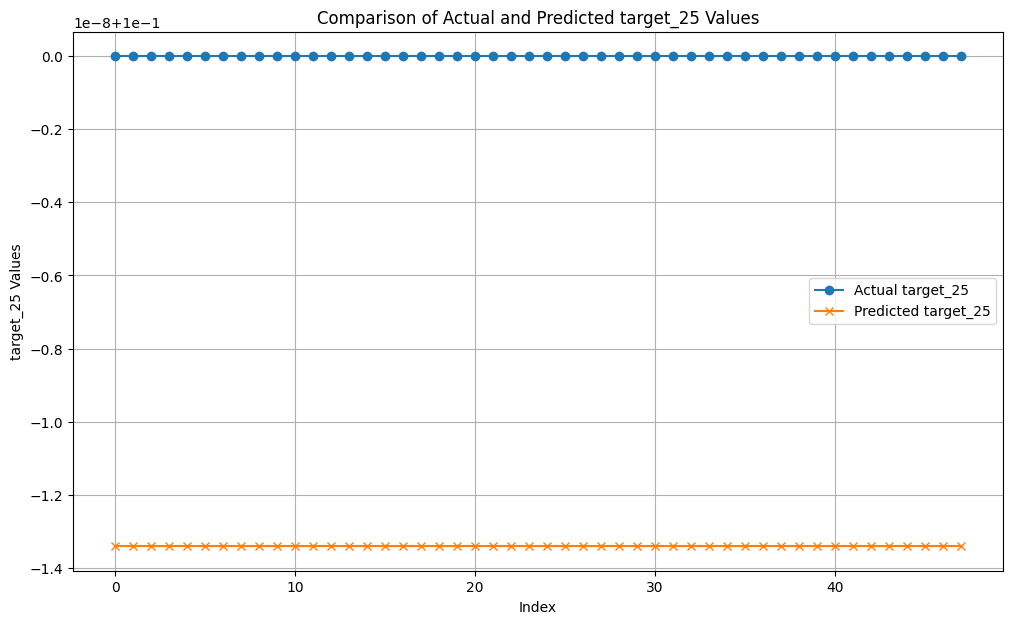

In [386]:
# Target_25
save_model_function(model, save_path, 'target_25')
model_evaluate('target_25', directory_path, save_path)

## target 26

In [387]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_26'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [388]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [389]:
y = y_default
X = X_standardized

In [390]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [391]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [392]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 0.0312 - mae: 0.1347 - mse: 0.0312 - rmse: 0.1654 - r2: -0.5175 - val_loss: 0.0182 - val_mae: 0.1084 - val_mse: 0.0182 - val_rmse: 0.1343 - val_r2: 0.1232
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.1058 - mse: 0.0174 - rmse: 0.1307 - r2: 0.1996 - val_loss: 0.0167 - val_mae: 0.1028 - val_mse: 0.0167 - val_rmse: 0.1282 - val_r2: 0.2045
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0158 - mae: 0.1011 - mse: 0.0158 - rmse: 0.1247 - r2: 0.2786 - val_loss: 0.0162 - val_mae: 0.1032 - val_mse: 0.0162 - val_rmse: 0.1264 - val_r2: 0.2375
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0984 - mse: 0.0150 - rmse: 0.1215 - r2: 0.3130 - val_loss: 0.0152 - val_mae: 0.0995 - val_mse: 0.0152 - val_rmse: 0.1226 - val_r2: 0.2815
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0148 -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_26.h5
2/2 [==============================] - 0s 2ms/step


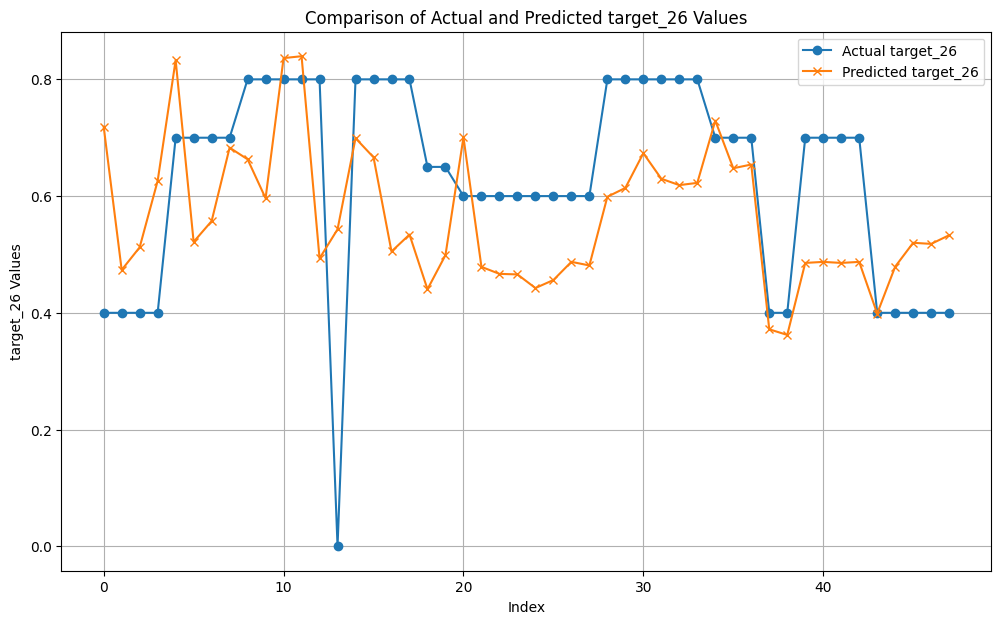

In [393]:
# Target_26
save_model_function(model, save_path, 'target_26')
model_evaluate('target_26', directory_path, save_path)

## target 27

In [394]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_27'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [395]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [396]:
y = y_default
X = X_standardized

In [397]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [398]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [399]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 0.0055 - mae: 0.0541 - mse: 0.0055 - rmse: 0.0700 - r2: -0.2113 - val_loss: 0.0041 - val_mae: 0.0484 - val_mse: 0.0041 - val_rmse: 0.0634 - val_r2: 0.2141
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0447 - mse: 0.0036 - rmse: 0.0588 - r2: 0.2447 - val_loss: 0.0039 - val_mae: 0.0463 - val_mse: 0.0039 - val_rmse: 0.0618 - val_r2: 0.2514
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0034 - mae: 0.0433 - mse: 0.0034 - rmse: 0.0574 - r2: 0.2851 - val_loss: 0.0038 - val_mae: 0.0461 - val_mse: 0.0038 - val_rmse: 0.0610 - val_r2: 0.2734
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0424 - mse: 0.0033 - rmse: 0.0563 - r2: 0.3190 - val_loss: 0.0037 - val_mae: 0.0452 - val_mse: 0.0037 - val_rmse: 0.0604 - val_r2: 0.2897
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0032 -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_27.h5
2/2 [==============================] - 0s 2ms/step


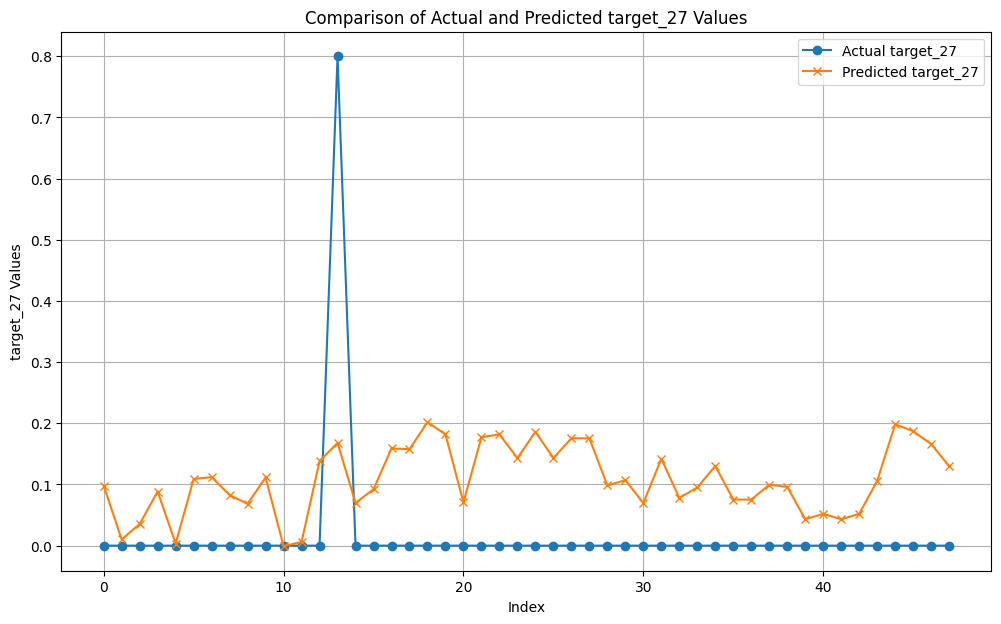

In [400]:
# Target_27
save_model_function(model, save_path, 'target_27')
model_evaluate('target_27', directory_path, save_path)

## target 28

In [401]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_28'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [402]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [403]:
y = y_default
X = X_standardized

In [404]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [405]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [406]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 0.1763 - mae: 0.3229 - mse: 0.1763 - rmse: 0.4116 - r2: 0.4982 - val_loss: 0.1650 - val_mae: 0.3110 - val_mse: 0.1650 - val_rmse: 0.4033 - val_r2: 0.5380
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1452 - mae: 0.2963 - mse: 0.1452 - rmse: 0.3774 - r2: 0.5961 - val_loss: 0.1685 - val_mae: 0.3158 - val_mse: 0.1685 - val_rmse: 0.4077 - val_r2: 0.5302
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1421 - mae: 0.2911 - mse: 0.1421 - rmse: 0.3733 - r2: 0.6039 - val_loss: 0.1581 - val_mae: 0.3102 - val_mse: 0.1581 - val_rmse: 0.3947 - val_r2: 0.5592
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1388 - mae: 0.2879 - mse: 0.1388 - rmse: 0.3686 - r2: 0.6142 - val_loss: 0.1667 - val_mae: 0.3115 - val_mse: 0.1667 - val_rmse: 0.4051 - val_r2: 0.5356
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1360 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_28.h5
2/2 [==============================] - 0s 1ms/step


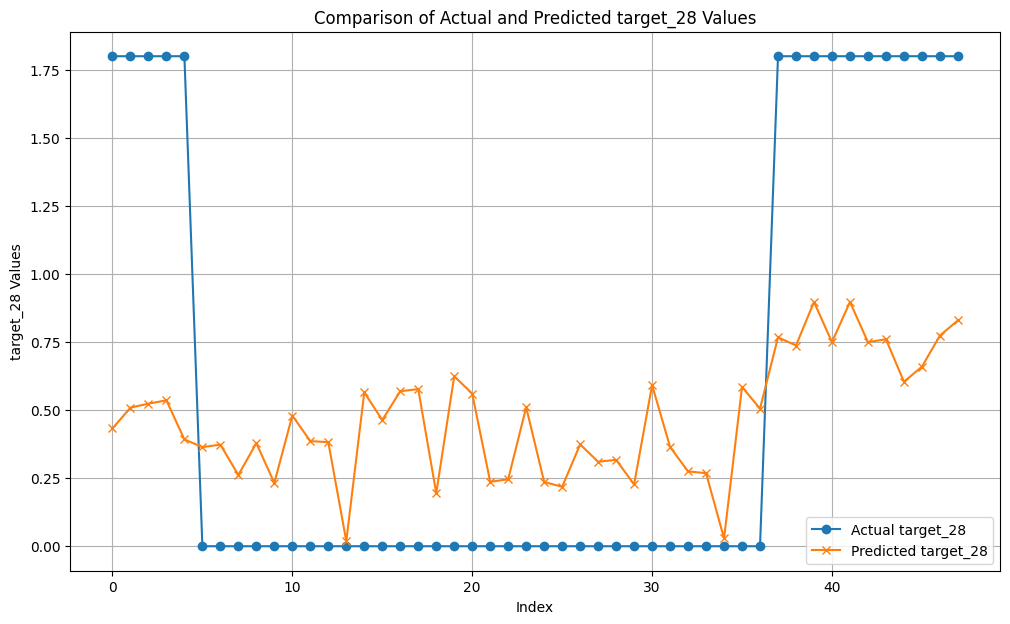

In [407]:
# Target_28
save_model_function(model, save_path, 'target_28')
model_evaluate('target_28', directory_path, save_path)

## target 29

In [408]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_29'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [409]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [410]:
y = y_default
X = X_standardized

In [411]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [412]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [413]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 3ms/step - loss: 0.2968 - mae: 0.4322 - mse: 0.2968 - rmse: 0.5283 - r2: 0.2997 - val_loss: 0.2163 - val_mae: 0.3758 - val_mse: 0.2163 - val_rmse: 0.4615 - val_r2: 0.4933
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 0.2106 - mae: 0.3694 - mse: 0.2106 - rmse: 0.4557 - r2: 0.5021 - val_loss: 0.2073 - val_mae: 0.3629 - val_mse: 0.2073 - val_rmse: 0.4509 - val_r2: 0.5179
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.2010 - mae: 0.3581 - mse: 0.2010 - rmse: 0.4441 - r2: 0.5264 - val_loss: 0.2072 - val_mae: 0.3615 - val_mse: 0.2072 - val_rmse: 0.4512 - val_r2: 0.5169
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.1944 - mae: 0.3523 - mse: 0.1944 - rmse: 0.4377 - r2: 0.5409 - val_loss: 0.2024 - val_mae: 0.3571 - val_mse: 0.2024 - val_rmse: 0.4463 - val_r2: 0.5258
Epoch 5/150
250/250 [==============================] - 1s 2ms/step - loss: 0.1922 - 

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_29.h5
2/2 [==============================] - 0s 2ms/step


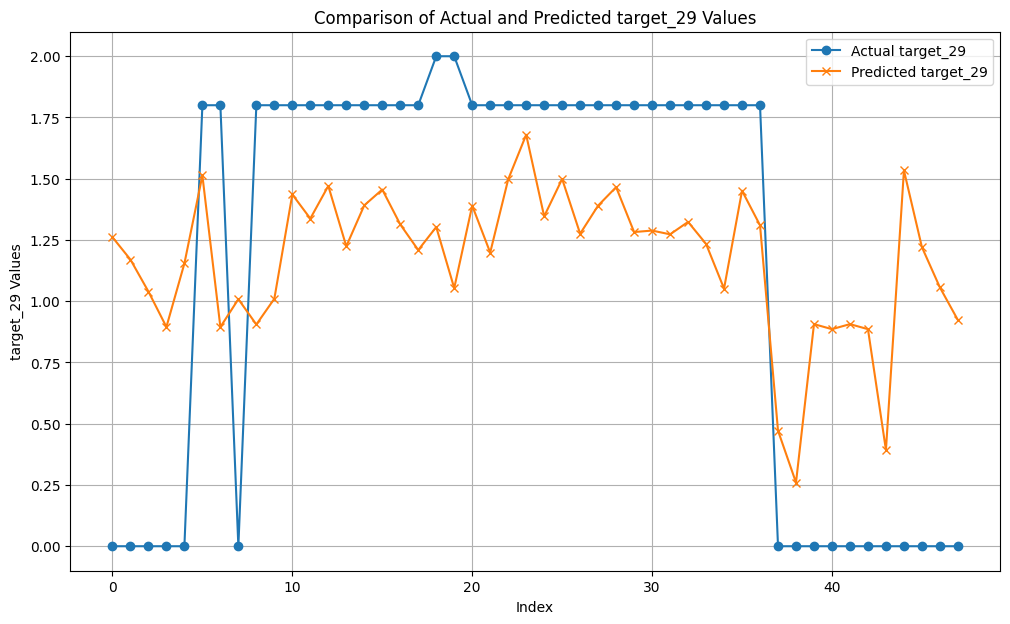

In [414]:
# Target_29
save_model_function(model, save_path, 'target_29')
model_evaluate('target_29', directory_path, save_path)

## target 30

In [415]:
directory_path = 'C:/Nikolas/Intership/Композитные материалы/Datasets/Dataset ПП04'
synthetic_file_name = 'synthetic_target_30'
synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
real_directory_path = os.path.join(directory_path, 'Splited datasets')

synthetic_file_path = os.path.join(synthetic_directory_path, synthetic_file_name + '.csv')
synthetic_data = pd.read_csv(synthetic_file_path)

df = synthetic_data
X_default = df.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y_default = df.iloc[:, -1]  # Последний столбец - целевая переменная

In [416]:
# Стандартизация данных
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_default), columns=X_default.columns)

# Сохранение модели StandardScaler
# from joblib import dump
# dump(scaler, 'scaler.joblib')

# Загрузите модель из файла
# scaler = load('scaler.joblib')

# X_standardized


In [417]:
y = y_default
X = X_standardized

In [418]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой
    Dense(32, activation='relu'),  # Скрытый слой
    Dense(1, activation='linear')  # Выходной слой для бинарной классификации
])


In [419]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse', rmse , r2])


In [420]:
model.fit(X, y, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 0.0104 - mae: 0.0741 - mse: 0.0104 - rmse: 0.0954 - r2: -0.1362 - val_loss: 0.0078 - val_mae: 0.0659 - val_mse: 0.0078 - val_rmse: 0.0871 - val_r2: 0.1512
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0074 - mae: 0.0654 - mse: 0.0074 - rmse: 0.0851 - r2: 0.1783 - val_loss: 0.0079 - val_mae: 0.0686 - val_mse: 0.0079 - val_rmse: 0.0879 - val_r2: 0.1148
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0070 - mae: 0.0638 - mse: 0.0070 - rmse: 0.0827 - r2: 0.2265 - val_loss: 0.0070 - val_mae: 0.0611 - val_mse: 0.0070 - val_rmse: 0.0825 - val_r2: 0.2403
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0068 - mae: 0.0625 - mse: 0.0068 - rmse: 0.0813 - r2: 0.2452 - val_loss: 0.0073 - val_mae: 0.0656 - val_mse: 0.0073 - val_rmse: 0.0844 - val_r2: 0.1859
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.0067 -

Модель сохранена по пути: C:/Nikolas/Intership/Композитные материалы/Train datasets/predict_components/target_30.h5
2/2 [==============================] - 0s 1ms/step


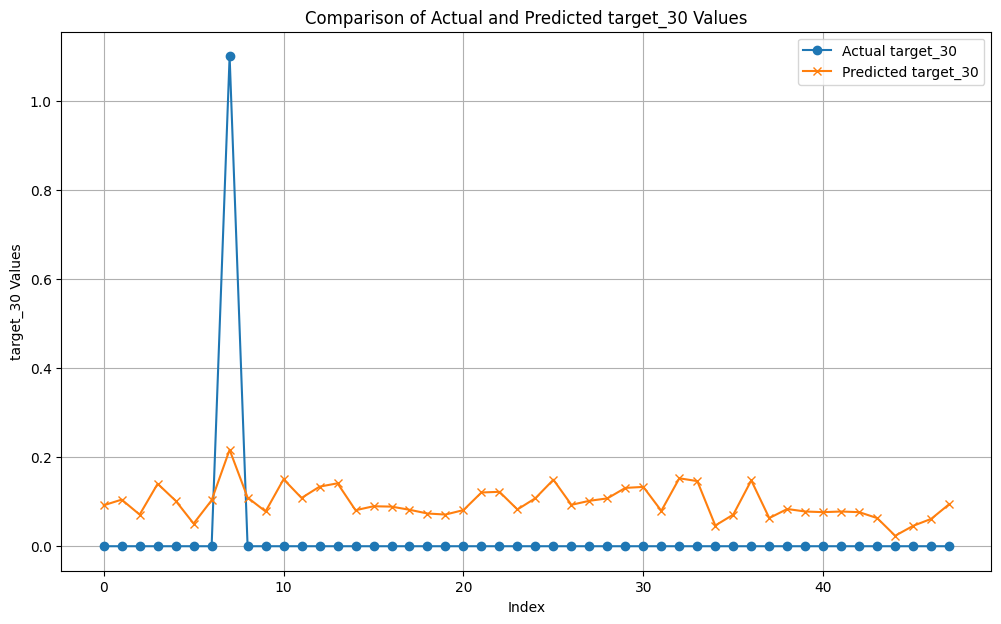

In [421]:
# Target_30
save_model_function(model, save_path, 'target_30')
model_evaluate('target_30', directory_path, save_path)

# other

In [ ]:

# Load the synthetic data
directory_path = r'C:\Nikolas\Intership\Композитные материалы\Datasets\Dataset ПП04\Generated datasets'
file_path = os.path.join(directory_path, 'synthetic_target_1.csv')
synthetic_data = pd.read_csv(file_path)

# Split the data into training and test sets
X = synthetic_data.drop('target_1', axis=1)
y = synthetic_data['target_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regressor
reg = StructuredDataRegressor(
    column_names=X_train.columns.tolist(),
    max_trials=10
)

# Train the regressor
reg.fit(
    x=X_train,
    y=y_train,
    epochs=10
)

# Predict on the test set
y_pred = reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")



In [ ]:
# Load the real data
directory_path = r'C:\Nikolas\Intership\Композитные материалы\Datasets\Dataset ПП04\Splited datasets'
file_path = os.path.join(directory_path, 'target_1.csv')
real_data = pd.read_csv(file_path)

# Assuming 'reg' is your trained StructuredDataRegressor and is still in scope
# Make predictions on the real data features, excluding the target column
y_pred = reg.predict(real_data.drop('target_1', axis=1))

# Convert predictions to a DataFrame (necessary if y_pred is not already a DataFrame)
predictions_df = pd.DataFrame(y_pred, columns=['Predicted_target_1'])

# Append the predictions to the real_data DataFrame
real_data_with_predictions = real_data.join(predictions_df)

# Save the DataFrame with predictions to a new CSV file
output_file_path = os.path.join(directory_path, 'real_data_with_predictions.csv')
real_data_with_predictions.to_csv(output_file_path, index=False, sep=';')

print(f"Predictions added and saved to {output_file_path}")

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(real_data_with_predictions['target_1'], real_data_with_predictions['Predicted_target_1'], alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Target 1')
plt.ylabel('Predicted Target 1')
plt.grid(True)

# Optional: add a line of perfect prediction
plt.plot(real_data_with_predictions['target_1'], real_data_with_predictions['target_1'], color='red', linewidth=2)

plt.show()

In [ ]:
# Create the line plots
plt.figure(figsize=(12, 7))

# Plot actual values
plt.plot(real_data_with_predictions['target_1'], label='Actual Target 1', marker='o')

# Plot predicted values
plt.plot(real_data_with_predictions['Predicted_target_1'], label='Predicted Target 1', marker='x')

plt.title('Comparison of Actual and Predicted Target 1 Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
def train_and_evaluate(target_column, synthetic_file_name, max_trials, directory_path):
    # Define the directory path to the datasets
    synthetic_directory_path = os.path.join(directory_path, 'Generated datasets')
    file_path = os.path.join(synthetic_directory_path, synthetic_file_name)
    
    # Load the synthetic data
    synthetic_data = pd.read_csv(file_path)
    
    # Split the data into training and test sets
    X = synthetic_data.drop(target_column, axis=1)
    y = synthetic_data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the regressor with the specified number of trials
    reg = StructuredDataRegressor(column_names=X_train.columns.tolist(), max_trials=max_trials)
    
    # Train the regressor
    reg.fit(x=X_train, y=y_train, epochs=10)
    
    # Predict on the test set
    y_pred = reg.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    


    # Load the real data from a different directory
    real_directory_path = os.path.join(directory_path, 'Splited datasets')
    real_file_path = os.path.join(real_directory_path, 'target_1.csv')
    real_data = pd.read_csv(real_file_path)
    
    # Make predictions on the real data features, excluding the target column
    real_y_pred = reg.predict(real_data.drop(target_column, axis=1))
    
    # Convert predictions to a DataFrame
    predictions_df = pd.DataFrame(real_y_pred, columns=['Predicted_target_1'])
    
    # Append the predictions to the real_data DataFrame
    real_data_with_predictions = real_data.join(predictions_df)
    
    # Save the DataFrame with predictions to a new CSV file
    output_file_path = os.path.join(real_directory_path, 'real_data_with_predictions.csv')
    real_data_with_predictions.to_csv(output_file_path, index=False, sep=';')
    print(f"Predictions added and saved to {output_file_path}")
    
    # Create the line plots
    plt.figure(figsize=(12, 7))
    
    # Plot actual values
    plt.plot(real_data_with_predictions['target_1'], label='Actual Target 1', marker='o')
    
    # Plot predicted values
    plt.plot(real_data_with_predictions['Predicted_target_1'], label='Predicted Target 1', marker='x')
    
    plt.title('Comparison of Actual and Predicted Target 1 Values')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

        # Print the evaluation metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")



In [ ]:
# Usage example:
directory_path = r'C:\Nikolas\Intership\Композитные материалы\Datasets\Dataset ПП04'
train_and_evaluate('target_1', 'synthetic_target_1.csv', 10, directory_path)